In [ ]:
-# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

nedaladham_movies_with_plots_path = kagglehub.dataset_download('nedaladham/movies-with-plots')

print('Data source import complete.')


NameError: name 'kagglehub' is not defined

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

import pickle
#import mglearn
import time


from nltk.tokenize import TweetTokenizer
import nltk
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

In [ ]:
data = pd.read_csv('/content/wiki_movie_plots_deduped.csv')
data

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
...,...,...,...,...,...,...,...,...
34881,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ..."
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the..."
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i..."
34884,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...


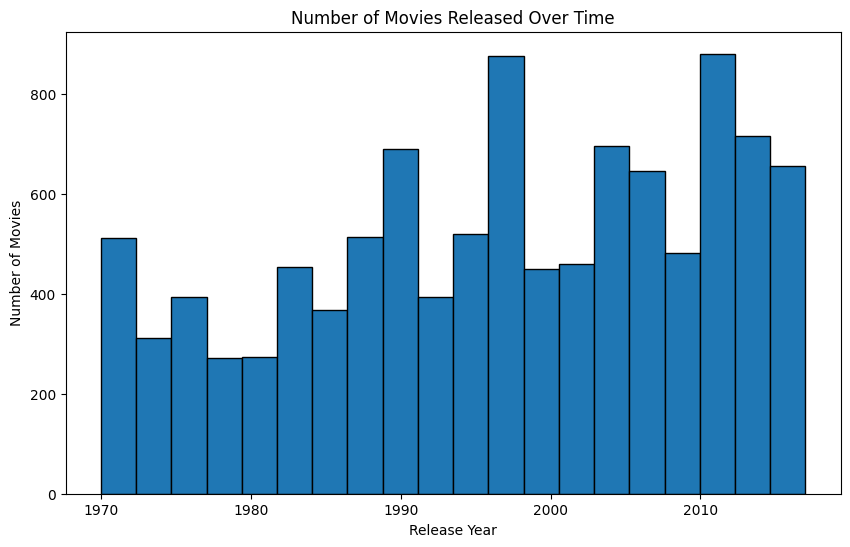

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['Release Year'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.title('Number of Movies Released Over Time')
plt.xlabel('Release Year')

_ = plt.ylabel('Number of Movies')

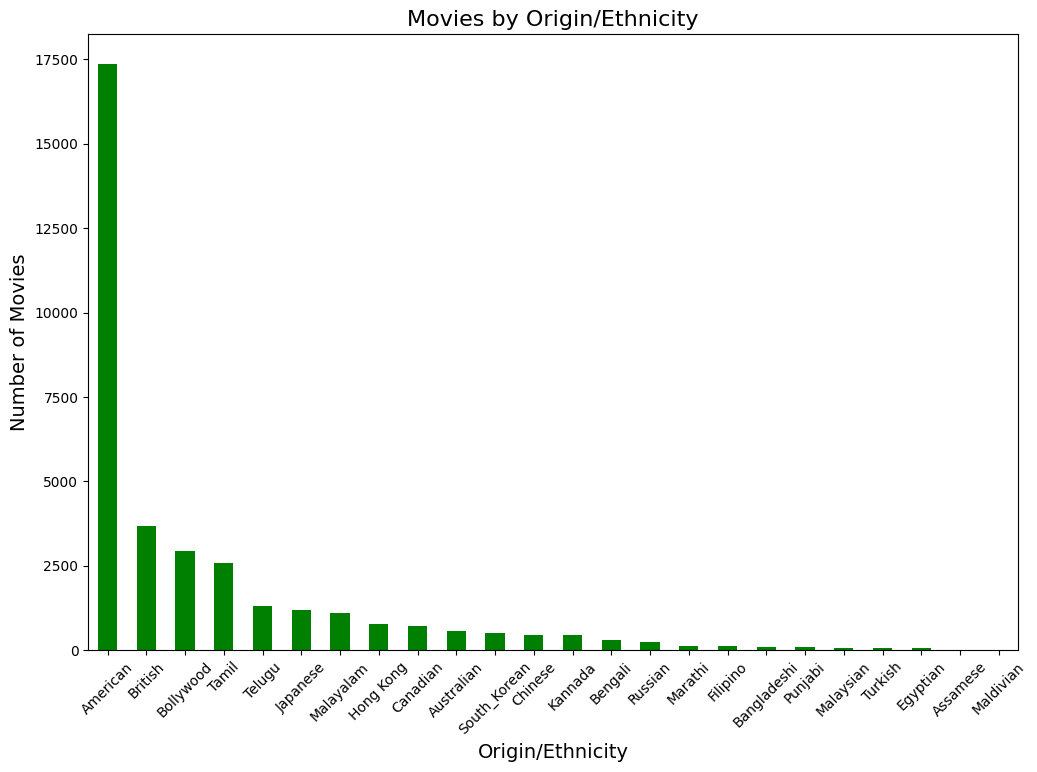

In [ ]:
# Movies by origin
origin_counts = data["Origin/Ethnicity"].value_counts()

# Plot
plt.figure(figsize=(12, 8))
origin_counts.plot(kind="bar", color="green")
plt.title("Movies by Origin/Ethnicity", fontsize=16)
plt.xlabel("Origin/Ethnicity", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.xticks(rotation=45)
plt.show()


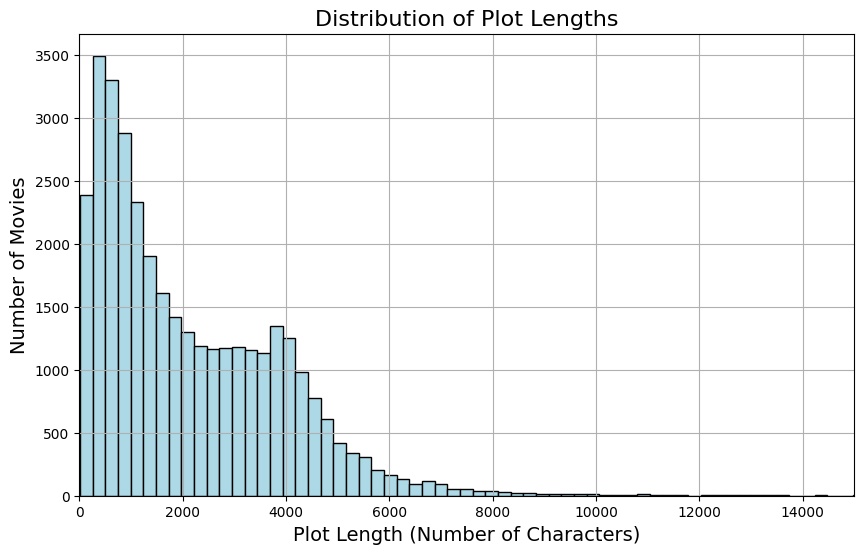

In [ ]:
# Calculate plot lengths
data["Plot_Length"] = data["Plot"].str.len()

# Plot
plt.figure(figsize=(10, 6))
data["Plot_Length"].hist(bins=150, color="lightblue", edgecolor="black")
plt.title("Distribution of Plot Lengths", fontsize=16)
plt.xlabel("Plot Length (Number of Characters)", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.xlim(0, 15000)
plt.show()

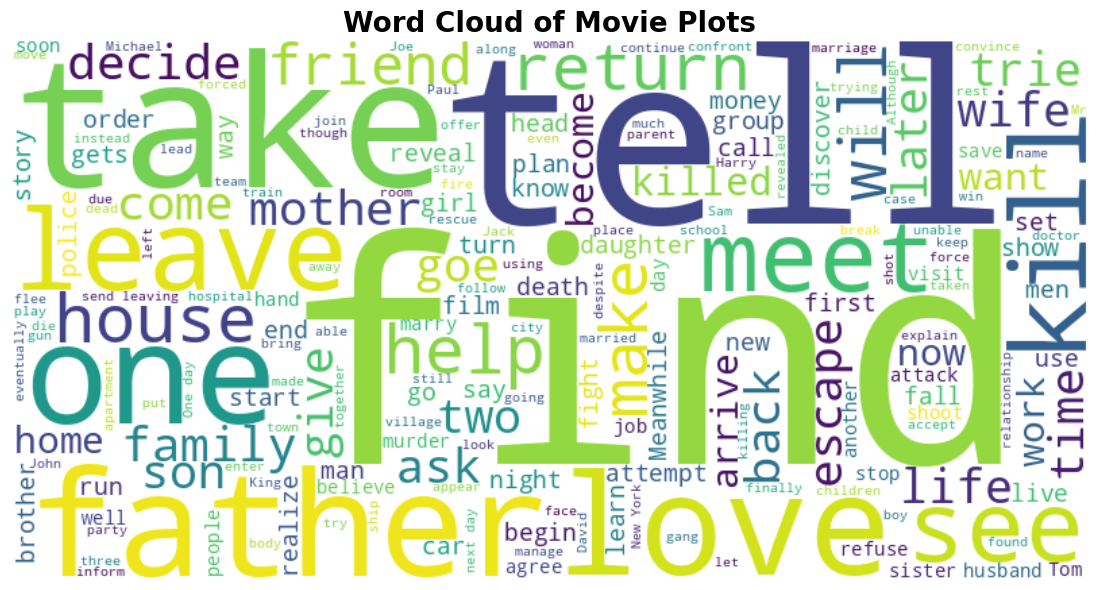

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all plots into one string
all_text = " ".join(data["Plot"].dropna())

# Define stopwords
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(
    width=800, height=400,
    background_color="white",
    stopwords=stopwords,
    max_words=200,
    colormap="viridis",
    contour_width=3,
    contour_color="steelblue"
).generate(all_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Movie Plots", fontsize=20, weight="bold")
plt.tight_layout()
plt.show()


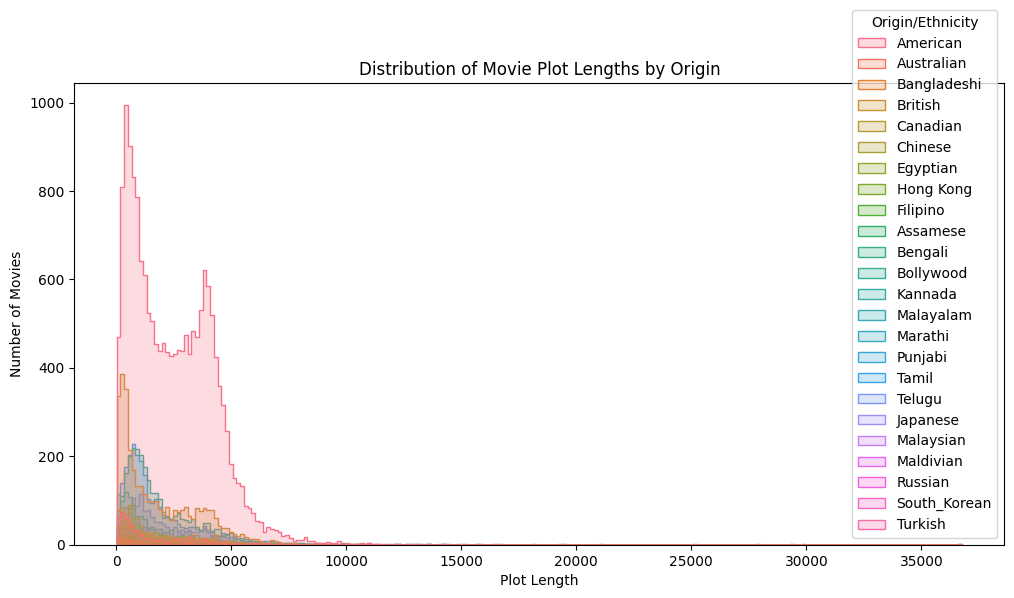

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Plot_Length', hue='Origin/Ethnicity', element='step', common_norm=False)
plt.title('Distribution of Movie Plot Lengths by Origin')
plt.xlabel('Plot Length')
_ = plt.ylabel('Number of Movies')

Dataset Filtering:

* To create a more focused and meaningful dataset, we filtered the data to include only American and British movies released from the year 1970 onward.

* This refinement reduced the dataset size from 34,885 movies to 10,567 movies, making it more manageable and relevant for analysis.

In [ ]:

data = data[(data['Origin/Ethnicity'].str.contains('British|American', case=False, na=False)) &
                 (data['Release Year'] >= 1970)]
data

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Plot_Length
8513,1970,Adam at Six A.M.,American,Robert Scheerer,"Michael Douglas, Lee Purcell, Joe Don Baker, L...",unknown,https://en.wikipedia.org/wiki/Adam_at_Six_A.M.,"The film revolves around Adam Gaines, a semant...",520
8514,1970,The Adventurers,American,Lewis Gilbert,"Bekim Fehmiu, Candice Bergen, Charles Aznavour...",unknown,https://en.wikipedia.org/wiki/The_Adventurers_...,Set in the fictional Latin American country of...,559
8515,1970,Airport,American,George Seaton,"Burt Lancaster, Dean Martin, Jean Seberg, Jacq...",unknown,https://en.wikipedia.org/wiki/Airport_(1970_film),Chicago is paralyzed by a snowstorm affecting ...,4139
8516,1970,Alex in Wonderland,American,Paul Mazursky,"Donald Sutherland, Ellen Burstyn, Federico Fel...",unknown,https://en.wikipedia.org/wiki/Alex_in_Wonderland,Young director Alex Morrison feels compelled t...,217
8517,1970,Angel Unchained,American,Lee Madden,"Larry Bishop, Tyne Daly, Aldo Ray",unknown,https://en.wikipedia.org/wiki/Angel_Unchained,"Following a gang fight, biker Angel, calls it ...",400
...,...,...,...,...,...,...,...,...,...
21705,2017,Murder on the Orient Express,British,Directors: Kenneth Branagh,Directors: Kenneth Branagh\r\nCast: Kenneth Br...,unknown,https://en.wikipedia.org/wiki/Murder_on_the_Or...,"In 1934, famous Belgian detective Hercule Poir...",4164
21706,2017,Paddington 2,British,Directors: Paul King,"Directors: Paul King\r\nCast: Ben Whishaw, Hug...",unknown,https://en.wikipedia.org/wiki/Paddington_2,"Paddington, having settled with the Brown fami...",4550
21707,2017,Finding Your Feet,British,Directors: Richard Loncraine,Directors: Richard Loncraine\r\nCast: Imelda S...,unknown,https://en.wikipedia.org/wiki/Finding_Your_Feet,‘Lady’ Sandra Abbott (Imelda Staunton) discove...,760
21708,2017,All the Money in the World,British,Director: Ridley Scott,Director: Ridley Scott\r\nCast: Michelle Willi...,unknown,https://en.wikipedia.org/wiki/All_the_Money_in...,"In 1973, 16-year-old John Paul Getty III (Paul...",3894


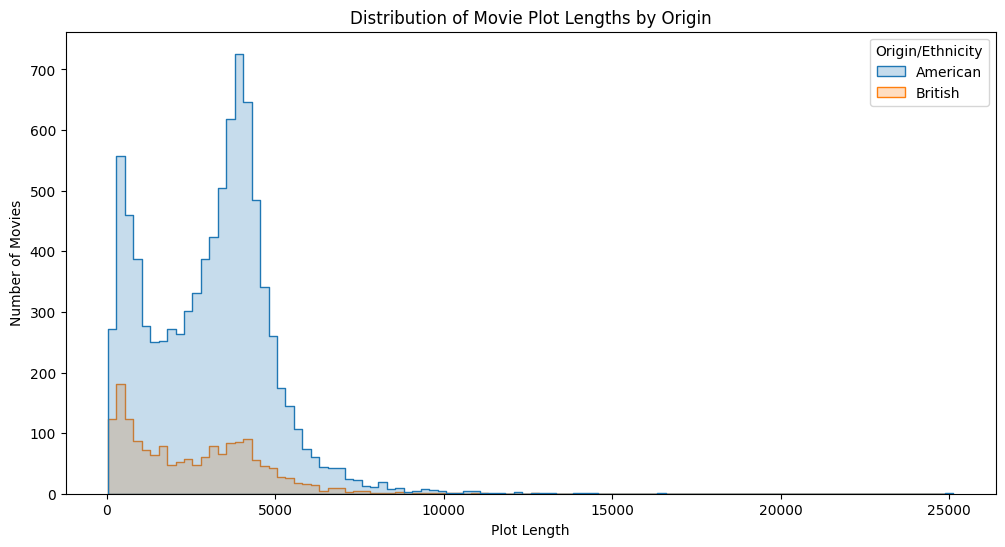

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Plot_Length', hue='Origin/Ethnicity', element='step', common_norm=False)  # Use element='step' for clearer visualization
plt.title('Distribution of Movie Plot Lengths by Origin')
plt.xlabel('Plot Length')
_ = plt.ylabel('Number of Movies')

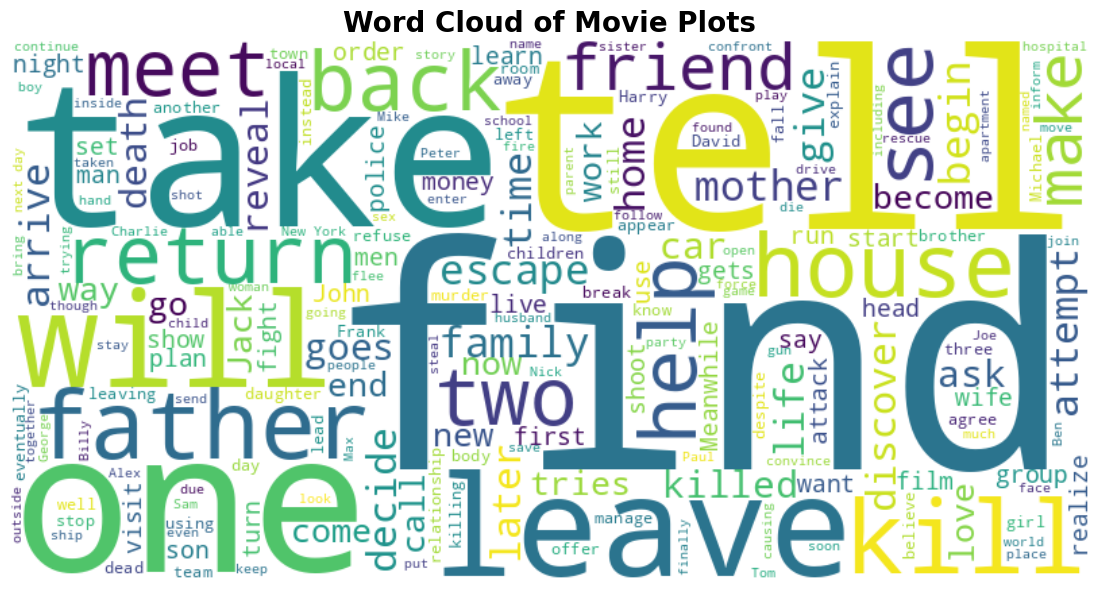

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all plots into one string
all_text = " ".join(data["Plot"].dropna())


stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    width=800, height=400,
    background_color="white",
    stopwords=stopwords,
    max_words=200,
    colormap="viridis",
    contour_width=3,
    contour_color="steelblue"
).generate(all_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Movie Plots", fontsize=20, weight="bold")
plt.tight_layout()
plt.show()


In [ ]:
toy_story_row = data[data['Title'] == 'Toy Story 2']
toy_story_plot = toy_story_row['Plot'].values[0]
print("Plot of Toy Story:")
print(toy_story_plot)


Plot of Toy Story:
Andy prepares to go to cowboy camp with Woody, but while playing with Woody and Buzz, he accidentally tears Woody's arm. Andy's mom puts Woody on a shelf, and Andy leaves without Woody. The next day, Woody finds that Wheezy has been shelved for months due to a broken squeaker. Andy's mother puts Wheezy in a yard sale, but Woody rescues him, only to be stolen by a greedy toy collector, who takes him to his apartment. Buzz Lightyear and the rest of Andy's toys identify the thief from a commercial to be Al McWhiggin, the owner of Al's Toy Barn. Buzz, Hamm, Mr. Potato Head, Slinky Dog, and Rex set out to rescue Woody.
At Al's apartment, Woody learns that he is based on a 1950s[9] television show called Woody's Roundup, and that along with the other Roundup toys – Jessie, Bullseye, and Stinky Pete the Prospector – he is set to be sold to a toy museum in Tokyo, Japan. While the others are excited about going, Woody intends to return home to Andy. Stinky Pete explains that 

Data scraping:

* Additional scraping was performed to gather IMDb ratings and the number of votes for each movie.
* These metrics will serve as weighting factors helping to prioritize highly-rated and popular movies in the output.

In [ ]:
movies = data['Title'].dropna().tolist()

In [ ]:
pip install imdbpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 kB 4.7 MB/s eta 0:00:00


In [ ]:

from imdb import IMDb
def get_imdb_movie_info(movie_name):
    """Fetch IMDb rating and number of reviews for a movie."""
    ia = IMDb()
    movies = ia.search_movie(movie_name)
    if movies:
        movie = movies[0]
        ia.update(movie)
        rating = movie.get('rating', 'N/A')
        votes = movie.get('votes', 'N/A')
        return rating, votes
    else:
        return 'N/A', 'N/A'
ratings_and_reviews = []
for movie in movies:
    rating, votes = get_imdb_movie_info(movie)
    ratings_and_reviews.append((movie, rating, votes))
    print(f"Movie: {movie}, Rating: {rating}, Votes: {votes}")


Movie: Adam at Six A.M., Rating: 5.6, Votes: 446
Movie: The Adventurers, Rating: 5.2, Votes: 944
Movie: Airport, Rating: 6.6, Votes: 22829
Movie: Alex in Wonderland, Rating: 5.4, Votes: 1028
Movie: Angel Unchained, Rating: 5.1, Votes: 501
Movie: The Aristocats, Rating: 7.1, Votes: 118310
Movie: The Baby Maker, Rating: 6.1, Votes: 363
Movie: The Ballad of Cable Hogue, Rating: 7.2, Votes: 10803
Movie: Barquero, Rating: 6.3, Votes: 2140


KeyboardInterrupt: 

In [ ]:
def save_list_to_file(data_list, filename):
    """Save a list to a text file."""
    try:
        with open(filename, 'w') as file:
            for item in data_list:
                file.write(f"{item}\n")
        print(f"List successfully saved to {filename}")
    except Exception as e:
        print(f"Error saving list to file: {e}")
save_list_to_file(movies, "movie_list.txt")


In [ ]:
pip install imdbpy

In [ ]:
from imdb import IMDb
import concurrent.futures
import json
from tqdm import tqdm

# Function to fetch IMDb rating for a single movie
def get_imdb_movie_info(movie_name):
    ia = IMDb()
    movies = ia.search_movie(movie_name)
    if movies:
        movie = movies[0]  # Take the first result
        ia.update(movie)  # Fetch full details
        imdb_rating = movie.get('rating', 'N/A')
        return movie_name, imdb_rating
    else:
        return movie_name, 'N/A'

# Process movies in parallel and download ratings with progress bar
def process_movies(movie_list, max_calls=1000, output_file="imdb_ratings.json"):
    ia = IMDb()
    results = {}

    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        # Use tqdm to wrap the futures
        futures = {executor.submit(get_imdb_movie_info, movie): movie for movie in movie_list[:max_calls]}
        for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc="Processing Movies"):
            movie, rating = future.result()
            results[movie] = rating

    # Save ratings to a file
    with open(output_file, "w") as f:
        json.dump(results, f, indent=4)
    print(f"Ratings saved to {output_file}")
    return results


ratings = process_movies(movies)

# Print results
print("IMDb Ratings:", ratings)


In [ ]:
imdb_ratings

Genre Cleaning:

* Although the genre was not directly used in our analysis, we performed extensive cleaning due to its inconsistent and disorganized state.
* By the end of the cleaning process, the genres were standardized into a single consistent format.
* For movies with multiple genres we make it only one at the end
* for the whole dataset we selected the most frequent genres

In [ ]:
# creation of the column count for aggregation
movies = data.copy()
movies = movies[movies['Genre'] != 'Unknown']
movies['Count']=1
movies[['Genre','Count']].groupby(['Genre'], as_index=False).count().shape[0]


714

In [ ]:
# cleaning and formating to have only one genre per movie
movies['GenreCorrected'] =movies['Genre']
movies['GenreCorrected']=movies['GenreCorrected'].str.strip()
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' - ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' / ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('/', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' & ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(', ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('; ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bio-pic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biopic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biographical', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biodrama', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bio-drama', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biographic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(film genre\)', '')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('animated','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('anime','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('children\'s','children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedey','comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\[not in citation given\]','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' set 4,000 years ago in the canadian arctic','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('historical','history')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romantic','romance')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('3-d','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('3d','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('viacom 18 motion pictures','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sci-fi','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('ttriller','thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('.','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('based on radio serial','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' on the early years of hitler','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sci fi','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science fiction','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' (30min)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('16 mm film','short')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\[140\]','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\[144\]','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' for ','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('adventures','adventure')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('kung fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('kung-fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial arts','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('world war ii','war')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('world war i','war')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biography about montreal canadiens star|maurice richard','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bholenath movies|cinekorn entertainment','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(volleyball\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('spy film','spy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('anthology film','anthology')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biography fim','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('avant-garde','avant_garde')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biker film','biker')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('buddy cop','buddy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('buddy film','buddy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedy 2-reeler','comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('films','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('film','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biography of pioneering american photographer eadweard muybridge','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('british-german co-production','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bruceploitation','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedy-drama adaptation of the mordecai richler novel','comedy-drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('movies by the mob\|knkspl','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('movies','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('movie','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('coming of age','coming_of_age')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('coming-of-age','coming_of_age')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('drama about child soldiers','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( based).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( co-produced).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( adapted).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( about).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('musical b','musical')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('animationchildren','animation|children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' period','period')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('drama loosely','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(aquatics|swimming\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(aquatics|swimming\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("yogesh dattatraya gosavi's directorial debut \[9\]",'')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("war-time","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("wartime","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("ww1","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('unknown','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("wwii","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('psychological','psycho')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('rom-coms','romance')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('true crime','crime')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|007','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('slice of life','slice_of_life')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('computer animation','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('gun fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('j-horror','horror')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(shogi|chess\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('afghan war drama','war drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|6 separate stories','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(30min\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' (road bicycle racing)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' v-cinema','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('tv miniseries','tv_miniseries')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|docudrama','\|documentary|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' in animation','|animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((adaptation).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((adaptated).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((adapted).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( on ).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('american football','sports')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dev\|nusrat jahan','sports')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('television miniseries','tv_miniseries')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(artistic\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \|direct-to-dvd','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('history dram','history drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial art','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('psycho thriller,','psycho thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|1 girl\|3 suitors','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(road bicycle racing\)','')
filterE = movies['GenreCorrected']=="ero"
movies.loc[filterE,'GenreCorrected']="adult"
filterE = movies['GenreCorrected']=="music"
movies.loc[filterE,'GenreCorrected']="musical"
filterE = movies['GenreCorrected']=="-"
movies.loc[filterE,'GenreCorrected']=''
filterE = movies['GenreCorrected']=="comedy–drama"
movies.loc[filterE,'GenreCorrected'] = "comedy|drama"
filterE = movies['GenreCorrected']=="comedy–horror"
movies.loc[filterE,'GenreCorrected'] = "comedy|horror"
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' ','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(',','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('-','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionadventure','action|adventure')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actioncomedy','action|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actiondrama','action|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionlove','action|love')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionmasala','action|masala')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionchildren','action|children')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantasychildren\|','fantasy|children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantasycomedy','fantasy|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantasyperiod','fantasy|period')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('cbctv_miniseries','tv_miniseries')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramacomedy','drama|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramacomedysocial','drama|comedy|social')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramathriller','drama|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedydrama','comedy|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramathriller','drama|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedyhorror','comedy|horror')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sciencefiction','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('adventurecomedy','adventure|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('animationdrama','animation|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|\|','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('muslim','religious')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('thriler','thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('crimethriller','crime|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantay','fantasy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionthriller','action|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedysocial','comedy|social')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martialarts','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|\(children\|poker\|karuta\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('epichistory','epic|history')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('erotica','adult')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('erotic','adult')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((\|produced\|).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('chanbara','chambara')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedythriller','comedy|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biblical','religious')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biblical','religious')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('colour\|yellow\|productions\|eros\|international','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|directtodvd','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('liveaction','live|action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('melodrama','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superheroes','superheroe')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('gangsterthriller','gangster|thriller')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('heistcomedy','comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('heist','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('historic','history')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('historydisaster','history|disaster')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('warcomedy','war|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('westerncomedy','western|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('ancientcostume','costume')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('computeranimation','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramatic','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('familya','family')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('familya','family')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramedy','drama|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramaa','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('famil\|','family')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superheroe','superhero')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biogtaphy','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('devotionalbiography','devotional|biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('docufiction','documentary|fiction')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('familydrama','family|drama')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('espionage','spy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('supeheroes','superhero')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romancefiction','romance|fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('horrorthriller','horror|thriller')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('suspensethriller','suspense|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('musicaliography','musical|biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('triller','thriller')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|\(fiction\)','|fiction')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romanceaction','romance|action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romancecomedy','romance|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romancehorror','romance|horror')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romcom','romance|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('rom\|com','romance|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('satirical','satire')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science_fictionchildren','science_fiction|children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('homosexual','adult')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sexual','adult')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('mockumentary','documentary')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('periodic','period')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romanctic','romantic')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('politics','political')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('samurai','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('tv_miniseries','series')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('serial','series')

filterE = movies['GenreCorrected']=="musical–comedy"
movies.loc[filterE,'GenreCorrected'] = "musical|comedy"

filterE = movies['GenreCorrected']=="roman|porno"
movies.loc[filterE,'GenreCorrected'] = "adult"


filterE = movies['GenreCorrected']=="action—masala"
movies.loc[filterE,'GenreCorrected'] = "action|masala"


filterE = movies['GenreCorrected']=="horror–thriller"
movies.loc[filterE,'GenreCorrected'] = "horror|thriller"

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('family','children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial_arts','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('horror','thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('war','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('adventure','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science_fiction','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('western','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('western','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('noir','black')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('spy','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superhero','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('social','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('suspense','action')


filterE = movies['GenreCorrected']=="drama|romance|adult|children"
movies.loc[filterE,'GenreCorrected'] = "drama|romance|adult"

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|–\|','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.strip(to_strip='\|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionner','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.strip()

In [ ]:
from collections import Counter

genre_counts = movies['GenreCorrected'].value_counts()
genre_list = genre_counts.index.tolist()
# Example list of words
word_list = genre_list
# Count the occurrences of each word in the list
word_counts = Counter(word_list)

# Get the most common words and their counts
most_common_words = word_counts.most_common()

# Display the most common words
print("Most common words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


Most common words:
drama: 1
comedy: 1
action: 1
thriller: 1
: 1
crime|drama: 1
comedy|drama: 1
animation: 1
romance|comedy: 1
children: 1
fantasy: 1
biography: 1
action|comedy: 1
romance: 1
crime: 1
action|action: 1
documentary: 1
musical: 1
action|thriller: 1
mystery: 1
biography|drama: 1
drama|biography: 1
drama|comedy: 1
action|drama: 1
crime|comedy: 1
thriller|comedy: 1
comedy|children: 1
thriller|thriller: 1
black|comedy: 1
drama|action: 1
comedy|thriller: 1
romance|drama: 1
comedy|crime: 1
comedy|action: 1
drama|thriller: 1
animation|children: 1
musical|comedy: 1
children|fantasy: 1
crime|thriller: 1
drama|musical: 1
drama|sports: 1
history|drama: 1
action|fantasy: 1
disaster: 1
thriller|action: 1
drama|romance: 1
psycho|thriller: 1
animation|comedy: 1
sex|comedy: 1
action|children: 1
rom|com: 1
slasher: 1
action|biography: 1
action|crime: 1
comedy|fantasy: 1
animation|action: 1
comedy|sports: 1
action|action|action: 1
comedy|musical: 1
supernatural|thriller: 1
literary|drama: 1


In [ ]:
# Filter genres containing the word "war"
war_genres = movies[movies['Genre'].str.contains('war', case=False)]
# Display the filtered genres
print(war_genres['Genre'])


8531               war, comedy
8553                       war
8564               war, action
8573               comedy, war
8582                war, biker
                 ...          
20659              world war i
20778    world war ii/thriller
20818      world war ii comedy
20889                war drama
20937                      war
Name: Genre, Length: 123, dtype: object


In [ ]:
moviesGenre = movies[['GenreCorrected']].groupby(['GenreCorrected']).size().reset_index(name='Count')
moviesGenre.to_csv('GenreCorrected.csv', sep=',', index=False)
movies['GenreCorrected'].value_counts(ascending=False).head(10)

,count
GenreCorrected,
drama,1894
comedy,1847
action,1233
thriller,1202
,910
crime|drama,323
comedy|drama,242
animation,227
romance|comedy,195


In [ ]:
genre_counts = movies['GenreCorrected'].value_counts()
genre_list = genre_counts.index.tolist()
print(len(genre_list))


418


In [ ]:
data = movies.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10567 entries, 8513 to 21709
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      10567 non-null  int64 
 1   Title             10567 non-null  object
 2   Origin/Ethnicity  10567 non-null  object
 3   Director          10567 non-null  object
 4   Cast              10374 non-null  object
 5   Genre             10567 non-null  object
 6   Wiki Page         10567 non-null  object
 7   Plot              10567 non-null  object
 8   Plot_Length       10567 non-null  int64 
 9   Count             10567 non-null  int64 
 10  GenreCorrected    10567 non-null  object
dtypes: int64(3), object(8)
memory usage: 990.7+ KB


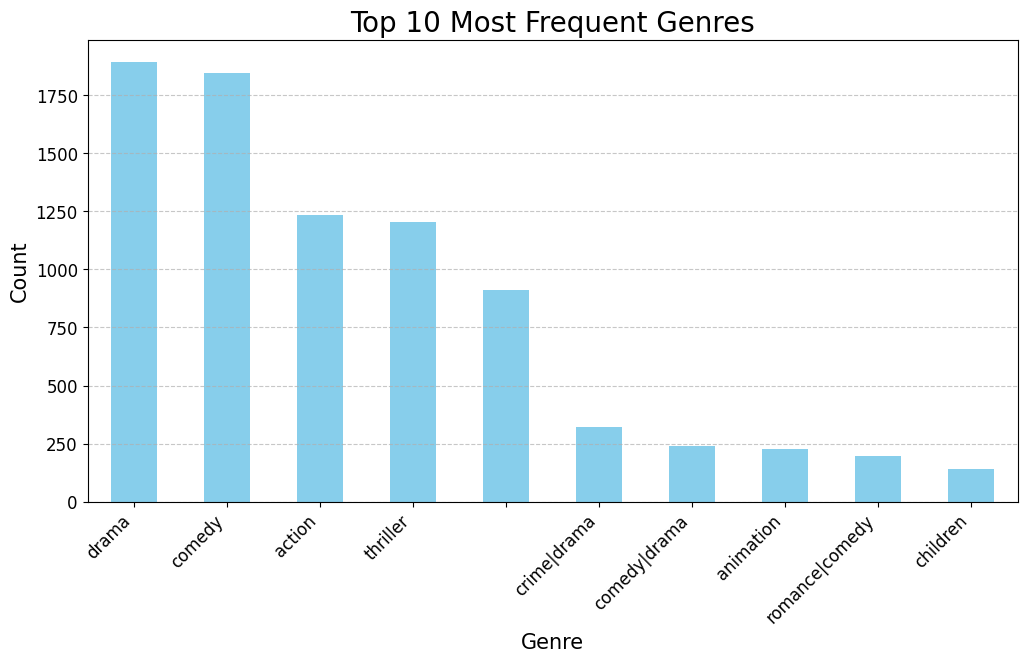

In [ ]:
# Get the top 10 most frequent genres
top_genres = data['GenreCorrected'].value_counts(ascending=False).head(10)

# Plotting the top 10 most frequent genres
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Genres', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adjusting y-axis ticks
plt.yticks(range(0, top_genres.max() + 1, 250))  # Adjust the range and step size as needed

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import pandas as pd

desc = pd.DataFrame(index=list(data))
desc['count'] = data.count()
desc['nunique'] = data.nunique()
desc['%unique'] = desc['nunique'] / len(data) * 100
desc['null'] = data.isnull().sum()
desc['%null'] = desc['null'] / len(data) * 100
desc['type'] = data.dtypes
desc = pd.concat([desc, data.describe().T.drop('count', axis=1)], axis=1)
desc


,count,nunique,%unique,null,%null,type,mean,std,min,25%,50%,75%,max
Release Year,10567,48,0.454244,0,0.000000,int64,1996.491341,13.298424,1970.0,1987.0,1997.0,2008.0,2017.0
Title,10567,10167,96.214630,0,0.000000,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Origin/Ethnicity,10567,2,0.018927,0,0.000000,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Director,10567,4697,44.449702,0,0.000000,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cast,10374,10249,96.990631,193,1.826441,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,10567,714,6.756885,0,0.000000,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wiki Page,10567,10375,98.183023,0,0.000000,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plot,10567,10350,97.946437,0,0.000000,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plot_Length,10567,4952,46.862875,0,0.000000,int64,2983.945207,1843.200370,35.0,1380.5,3178.0,4147.5,25123.0
Count,10567,1,0.009463,0,0.000000,int64,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [ ]:
moviesGenre = movies[['GenreCorrected','Count']].groupby(['GenreCorrected']).count()
moviesGenre.to_csv('GenreCorrected.csv',sep=',')

In [ ]:
movies[['GenreCorrected','Count']].groupby(['GenreCorrected'], as_index=False).count().shape[0]

418

In [ ]:
movies[['GenreCorrected','Count']].groupby(['GenreCorrected'],as_index=False).count().sort_values(['Count'], ascending=False).head(10)

,GenreCorrected,Count
244,drama,1894
170,comedy,1847
2,action,1233
396,thriller,1202
0,,910
213,crime|drama,323
180,comedy|drama,242
80,animation,227
359,romance|comedy,195
149,children,143


In [ ]:
movies['GenreSplit']=movies['GenreCorrected'].str.split('|')
movies['GenreSplit']= movies['GenreSplit'].apply(np.sort).apply(np.unique)

In [ ]:
movies['GenreSplit'][10900]

array(['comedy'], dtype='<U6')

In [ ]:
import numpy as np

# Initialize an empty array
genres_array = np.array([])

# Loop through the DataFrame using iloc for proper indexing
for i in range(movies.shape[0]):  # This includes the last row now
    genres_array = np.concatenate((genres_array, movies['GenreSplit'].iloc[i]))

genres_array


array(['', '', '', ..., '', '', ''], dtype='<U32')

In [ ]:
genres = pd.DataFrame({'Genre':genres_array})

In [ ]:
# histogram for the genres is most welcome
genres['Count']=1
genres[['Genre','Count']].groupby(['Genre'], as_index=False).sum().sort_values(['Count'], ascending=False).head(10)

,Genre,Count
37,drama,2968
24,comedy,2881
4,action,1842
102,thriller,1552
0,,914
28,crime,558
78,romance,397
7,animation,337
19,children,305
13,biography,257


In [ ]:
genres=genres[['Genre','Count']].groupby(['Genre'], as_index=False).sum().sort_values(['Count'], ascending=False)

In [ ]:
genres = genres[genres['Genre']!='']
genres.head(25)

,Genre,Count
37,drama,2968
24,comedy,2881
4,action,1842
102,thriller,1552
28,crime,558
78,romance,397
7,animation,337
19,children,305
13,biography,257
43,fantasy,250


In [ ]:
TotalCountGenres=sum(genres['Count'])
TotalCountGenres

12155

In [ ]:
genres['Frequency'] = genres['Count']/TotalCountGenres
genres['CumulativeFrequency'] = genres['Frequency'].cumsum()
genres.head(20)

,Genre,Count,Frequency,CumulativeFrequency
37,drama,2968,0.244179,0.244179
24,comedy,2881,0.237022,0.481201
4,action,1842,0.151543,0.632744
102,thriller,1552,0.127684,0.760428
28,crime,558,0.045907,0.806335
78,romance,397,0.032661,0.838996
7,animation,337,0.027725,0.866722
19,children,305,0.025093,0.891814
13,biography,257,0.021144,0.912958
43,fantasy,250,0.020568,0.933525


In [ ]:
np.array(genres[genres['CumulativeFrequency']<=.8]['Genre'])

array(['drama', 'comedy', 'action', 'thriller'], dtype=object)

In [ ]:
mainGenres=np.array(genres[genres['CumulativeFrequency']<=.85]['Genre'])
arr1=np.array(['adult', 'romance', 'drama','and'])
arr1[np.in1d(arr1,mainGenres)] # genres not in the mainGenres array will be deleted

array(['romance', 'drama'], dtype='<U7')

In [ ]:
movies['GenreSplit'][100:110].apply(lambda x: x[np.in1d(x,mainGenres)])

,GenreSplit
8613,[comedy]
8614,[action]
8615,[drama]
8616,[drama]
8617,[romance]
8618,[comedy]
8619,[comedy]
8620,[comedy]
8621,[thriller]
8622,[drama]


In [ ]:
movies['GenreSplitMain'] = movies['GenreSplit'].apply(lambda x: x[np.in1d(x, mainGenres)]).copy()


In [ ]:
movies[["Title",'GenreSplitMain','GenreSplit','Genre']][50:100]

,Title,GenreSplitMain,GenreSplit,Genre
8563,Joe,[drama],[drama],drama
8564,Kelly's Heroes,[action],[action],"war, action"
8565,The Kremlin Letter,[thriller],[thriller],thriller
8566,The Lady in the Car with Glasses and a Gun,[thriller],[thriller],thriller
8567,The Landlord,[comedy],[comedy],comedy
8568,Last of the Mobile Hot Shots,[drama],[drama],drama
8569,The Last Warrior,[action],[action],western
8570,Little Big Man,[action],[action],western
8571,Little Fauss and Big Halsy,[drama],[drama],drama
8572,Love Story,[romance],[romance],romance


In [ ]:
movies[50:52]

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Plot_Length,Count,GenreCorrected,GenreSplit,GenreSplitMain
8563,1970,Joe,American,John G. Avildsen,"Peter Boyle, Susan Sarandon",drama,https://en.wikipedia.org/wiki/Joe_(1970_film),"Advertising executive Bill Compton, his wife J...",1803,1,drama,[drama],[drama]
8564,1970,Kelly's Heroes,American,Brian G. Hutton,"Clint Eastwood, Telly Savalas, Don Rickles, Ca...","war, action",https://en.wikipedia.org/wiki/Kelly%27s_Heroes,"During a thunderstorm in early September 1944,...",3497,1,action|action,[action],[action]


#### in TEXT CLEANING we did

In [ ]:
overview = movies['Plot']
print(overview)

8513     The film revolves around Adam Gaines, a semant...
8514     Set in the fictional Latin American country of...
8515     Chicago is paralyzed by a snowstorm affecting ...
8516     Young director Alex Morrison feels compelled t...
8517     Following a gang fight, biker Angel, calls it ...
                               ...                        
21705    In 1934, famous Belgian detective Hercule Poir...
21706    Paddington, having settled with the Brown fami...
21707    ‘Lady’ Sandra Abbott (Imelda Staunton) discove...
21708    In 1973, 16-year-old John Paul Getty III (Paul...
21709    Olivia, a career lawyer in her 40's, feels rea...
Name: Plot, Length: 10567, dtype: object


In [ ]:
import nltk

# Download required NLTK resources
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define the preprocessing function
def preprocess_text(text, for_word2vec=False):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove special characters
    tokens = text.split()  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords
    return tokens if for_word2vec else ' '.join(tokens)  # Return tokenized or joined text

# Apply to create both cleaned and tokenized columns
movies['Plot_cleaned'] = movies['Plot'].apply(preprocess_text)  # For TF-IDF
movies['Plot_tokenized'] = movies['Plot'].apply(lambda x: preprocess_text(x, for_word2vec=True))  # For Word2Vec

print(movies[['Plot_cleaned', 'Plot_tokenized']].head())


##### Merge rating df with the original

In [ ]:
x = movies.copy()

In [ ]:
import pandas as pd

def process_csv_with_commas(file_path):
    # Open the file and process each line
    processed_data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip newline characters
            line = line.strip()
            # Split from the end into 3 parts: title, rating, and votes
            *title_parts, rating, votes = line.rsplit(',', 2)
            # Join the title parts back if split occurred
            title = ','.join(title_parts)
            # Append processed row
            processed_data.append([title.strip(), rating.strip(), votes.strip()])

    # Convert to DataFrame
    df = pd.DataFrame(processed_data, columns=['Title', 'Rating', 'Votes'])
    return df

# Process the file
file_path = '/content/finalneikcsv.csv'  # Replace with your file path
ratings_df = process_csv_with_commas(file_path)

# Display the first few rows
print(ratings_df.head())


In [ ]:
# Remove duplicate rows based on the 'Title' column (assuming a single rating per movie is needed)
ratings_df_unique = ratings_df.drop_duplicates(subset=['Title'])

# Merge with the movies DataFrame
merged_df = pd.merge(x, ratings_df_unique, on='Title', how='left')

# Display merged DataFrame
print("Merged DataFrame shape:", merged_df.shape)
print(merged_df.info())


In [ ]:
merged_df

In [ ]:
merged_df.to_csv('merged_df.csv', index=False)

## Models


In [1]:
import pandas as pd
movies = pd.read_csv('/content/merged_df.csv')
movies = movies . drop_duplicates()

In [2]:
pip install faiss-cpu

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import faiss  # Install with: pip install faiss-cpu
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import faiss
from transformers import AutoTokenizer, AutoModel
import torch
import pickle
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import faiss  # Install with: pip install faiss-cpu


# Step 1: TF-IDF Vectorization
vectorizer1 = TfidfVectorizer(max_features=5000)
tfidf_matrix1 = vectorizer1.fit_transform(movies["Plot_cleaned"])

# Step 2: Build FAISS Index
d = tfidf_matrix1.shape[1]  # Dimension of TF-IDF vectors
index1 = faiss.IndexFlatL2(d)  # L2 distance is equivalent to cosine similarity for normalized vectors
index1.add(tfidf_matrix1.toarray())  # Convert sparse matrix to dense and add to FAISS index

# Step 3: Recommendation Function with FAISS (Simplified for Comparison)
def recommend_movies_simple(user_query, tfidf_matrix, vectorizer, movies_df, index, top_n=5):
    user_query_preprocessed = " ".join(user_query.lower().split())  # Preprocess user query
    user_tfidf = vectorizer.transform([user_query_preprocessed]).toarray()  # Transform query to dense TF-IDF
    # Search FAISS index
    distances, indices = index.search(user_tfidf, top_n)  # Get top N nearest neighbors
    # Extract results based purely on distance
    indices = indices[0]
    distances = distances[0]
    # Combine results into a DataFrame
    recommendations = movies.iloc[indices].copy()
    recommendations["Distance"] = distances
    recommendations = recommendations.sort_values(by="Distance", ascending=True)  # Lower distance = better
    # Print recommendations
    for _, row in recommendations.iterrows():
        print(f"Movie: {row['Title']}, with Distance: {row['Distance']:.2f}")
    return recommendations['Title'].head(top_n).tolist()


# Example user  long input
print("______________long input___________________")
user_input = """Neo, a skilled computer hacker, discovers that his world is nothing more than a simulated reality called the Matrix. After being freed from the simulation by Morpheus, a legendary hacker, and Trinity, a skilled fighter, Neo learns the truth about humanity's enslavement by intelligent machines. He trains to harness his abilities within the Matrix, ultimately fighting powerful agents to save humanity."""
# Recommend movies
recommend_movies_simple(user_input, tfidf_matrix1, vectorizer1, movies, index1)
print("______________Mid input___________________")
user_input = """Neo, a hacker, learns that his reality is a simulation called the Matrix. With Morpheus and Trinity's help, he discovers his true potential and fights agents to free humanity from machine control."""
# Recommend movies based on the user input
recommend_movies_simple(user_input, tfidf_matrix1, vectorizer1, movies, index1)
print("______________short input___________________")
user_input = """Neo discovers the Matrix, a simulated reality, and fights to free humanity from machine control."""
# Recommend movies based on the user input
recommend_movies_simple(user_input, tfidf_matrix1, vectorizer1, movies, index1)


______________long input___________________
Movie: Blackhat, with Distance: 1.21
Movie: The Ambassador, with Distance: 1.25
Movie: Canadian Bacon, with Distance: 1.51
Movie: Hackers, with Distance: 1.59
Movie: The Matrix, with Distance: 1.70
______________Mid input___________________
Movie: Blackhat, with Distance: 1.26
Movie: The Ambassador, with Distance: 1.29
Movie: Canadian Bacon, with Distance: 1.52
Movie: Coherence, with Distance: 1.57
Movie: The Mangler, with Distance: 1.59
______________short input___________________
Movie: Coherence, with Distance: 1.37
Movie: The Mangler, with Distance: 1.39
Movie: 9, with Distance: 1.42
Movie: Contact, with Distance: 1.46
Movie: Deadly Advice, with Distance: 1.47


['Coherence', 'The Mangler', '9', 'Contact', 'Deadly Advice']

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import faiss  # Install with: pip install faiss-cpu


# Step 1: TF-IDF Vectorization
vectorizer1 = TfidfVectorizer(max_features=5000)
tfidf_matrix1 = vectorizer1.fit_transform(movies["Plot_cleaned"])

# Step 2: Build FAISS Index
d = tfidf_matrix1.shape[1]  # Dimension of TF-IDF vectors
index1 = faiss.IndexFlatL2(d)  # L2 distance is equivalent to cosine similarity for normalized vectors
index1.add(tfidf_matrix1.toarray())  # Convert sparse matrix to dense and add to FAISS index

# Step 3: Recommendation Function with FAISS (Simplified for Comparison)
def recommend_movies_simple(user_query, tfidf_matrix, vectorizer, movies_df, index, top_n=5):
    user_query_preprocessed = " ".join(user_query.lower().split())  # Preprocess user query
    user_tfidf = vectorizer.transform([user_query_preprocessed]).toarray()  # Transform query to dense TF-IDF
    # Search FAISS index
    distances, indices = index.search(user_tfidf, top_n)  # Get top N nearest neighbors
    # Extract results based purely on distance
    indices = indices[0]
    distances = distances[0]
    # Combine results into a DataFrame
    recommendations = movies.iloc[indices].copy()
    recommendations["Distance"] = distances
    recommendations = recommendations.sort_values(by="Distance", ascending=True)  # Lower distance = better
    # Print recommendations
    for _, row in recommendations.iterrows():
        print(f"Movie: {row['Title']}, with Distance: {row['Distance']:.2f}")
    return recommendations  # Return recommendations DataFrame

# Function to extract top k movie titles
def get_top_k_movies_simple(recommendations, k=5):
    return recommendations['Title'].head(k).tolist()

# Example user long input
print("______________Long input___________________")
user_input = """Neo, a skilled computer hacker, discovers that his world is nothing more than a simulated reality called the Matrix. After being freed from the simulation by Morpheus, a legendary hacker, and Trinity, a skilled fighter, Neo learns the truth about humanity's enslavement by intelligent machines. He trains to harness his abilities within the Matrix, ultimately fighting powerful agents to save humanity."""
# Recommend movies
recommendations_long_simple = recommend_movies_simple(user_input, tfidf_matrix1, vectorizer1, movies, index1)

print("______________Mid input___________________")
user_input = """Neo, a hacker, learns that his reality is a simulation called the Matrix. With Morpheus and Trinity's help, he discovers his true potential and fights agents to free humanity from machine control."""
# Recommend movies based on the user input
recommendations_mid_simple = recommend_movies_simple(user_input, tfidf_matrix1, vectorizer1, movies, index1)

print("______________Short input___________________")
user_input = """Neo discovers the Matrix, a simulated reality, and fights to free humanity from machine control."""
# Recommend movies based on the user input
recommendations_short_simple = recommend_movies_simple(user_input, tfidf_matrix1, vectorizer1, movies, index1)

# Get top k movies for each case
top_k_long = get_top_k_movies_simple(recommendations_long, k=5)
top_k_mid = get_top_k_movies_simple(recommendations_mid, k=5)
top_k_short = get_top_k_movies_simple(recommendations_short, k=5)

print("\nTop K Movies for Long Input:", top_k_long)
print("Top K Movies for Mid Input:", top_k_mid)
print("Top K Movies for Short Input:", top_k_short)


______________Long input___________________
Movie: Blackhat, with Distance: 1.21
Movie: The Ambassador, with Distance: 1.25
Movie: Canadian Bacon, with Distance: 1.51
Movie: Hackers, with Distance: 1.59
Movie: The Matrix, with Distance: 1.70
______________Mid input___________________
Movie: Blackhat, with Distance: 1.26
Movie: The Ambassador, with Distance: 1.29
Movie: Canadian Bacon, with Distance: 1.52
Movie: Coherence, with Distance: 1.57
Movie: The Mangler, with Distance: 1.59
______________Short input___________________
Movie: Coherence, with Distance: 1.37
Movie: The Mangler, with Distance: 1.39
Movie: 9, with Distance: 1.42
Movie: Contact, with Distance: 1.46
Movie: Deadly Advice, with Distance: 1.47


NameError: name 'recommendations_long' is not defined

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import faiss  # Install with: pip install faiss-cpu


# Step 1: TF-IDF Vectorization
vectorizer2 = TfidfVectorizer(max_features=5000)  # Optimize vocabulary size
tfidf_matrix2 = vectorizer2.fit_transform(movies["Plot_cleaned"])

# Step 2: Build FAISS Index
d = tfidf_matrix2.shape[1]  # Dimension of TF-IDF vectors
index2 = faiss.IndexFlatL2(d)  # L2 distance is equivalent to cosine similarity for normalized vectors
index2.add(tfidf_matrix2.toarray())  # Convert sparse matrix to dense and add to FAISS index

# Function to calculate weighted score
def calculate_weighted_score(indices, distances, ratings, votes):
    # Convert distances to similarity scores
    similarities = 1 / (1 + distances)  # Inverse of distance
    weighted_scores = similarities * ( votes[indices] * np.log1p(ratings[indices]))
    return weighted_scores/np.sum(weighted_scores)

# Step 3: Recommendation Function with FAISS
def recommend_movies_ann(user_query, tfidf_matrix, vectorizer, movies_df, index, top_n=5):
    user_query_preprocessed = " ".join(user_query.lower().split())  # Preprocess user query
    user_tfidf = vectorizer.transform([user_query_preprocessed]).toarray()  # Transform query to dense TF-IDF

    # Search FAISS index
    distances, indices = index.search(user_tfidf, top_n)  # Get top N nearest neighbors

    # Extract ratings and votes for the corresponding indices
    indices = indices[0]
    distances = distances[0]
    ratings = movies["Rating"].values
    votes = movies["Votes"].values

    # Calculate weighted scores
    weighted_scores = calculate_weighted_score(indices, distances, ratings, votes)

    # Combine results into a DataFrame
    recommendations = movies.iloc[indices].copy()
    recommendations["Weighted_Score"] = weighted_scores
    recommendations = recommendations.sort_values(by="Weighted_Score", ascending=False)

    # Print recommendations
    for _, row in recommendations.iterrows():
        print(f"Movie: {row['Title']}, Weighted Score: {row['Weighted_Score']:.2f}")
    return recommendations



In [6]:
# Example user  long input
print("____________long input________________")
user_input = """Neo, a skilled computer hacker, discovers that his world is nothing more than a simulated reality called the Matrix. After being freed from the simulation by Morpheus, a legendary hacker, and Trinity, a skilled fighter, Neo learns the truth about humanity's enslavement by intelligent machines. He trains to harness his abilities within the Matrix, ultimately fighting powerful agents to save humanity."""
# Recommend movies
recommend_movies_ann(user_input, tfidf_matrix2, vectorizer2, movies, index2)
print("_____________Mid input____________________")
# Example user input (mid length query)
user_input = """Neo, a hacker, learns that his reality is a simulation called the Matrix. With Morpheus and Trinity's help, he discovers his true potential and fights agents to free humanity from machine control."""
# Recommend movies based on the user input
recommend_movies_ann(user_input, tfidf_matrix2, vectorizer2, movies, index2)
print("______________short input___________________")
# Example user input (short length query)
user_input = """Neo discovers the Matrix, a simulated reality, and fights to free humanity from machine control."""
# Recommend movies based on the user input
recommend_movies_ann(user_input, tfidf_matrix2, vectorizer2, movies, index2)

____________long input________________
Movie: The Matrix, Weighted Score: 0.93
Movie: Hackers, Weighted Score: 0.03
Movie: Blackhat, Weighted Score: 0.03
Movie: Canadian Bacon, Weighted Score: 0.01
Movie: The Ambassador, Weighted Score: 0.00
_____________Mid input____________________
Movie: Coherence, Weighted Score: 0.63
Movie: Blackhat, Weighted Score: 0.27
Movie: Canadian Bacon, Weighted Score: 0.07
Movie: The Mangler, Weighted Score: 0.03
Movie: The Ambassador, Weighted Score: 0.00
______________short input___________________
Movie: Contact, Weighted Score: 0.58
Movie: Coherence, Weighted Score: 0.30
Movie: 9, Weighted Score: 0.10
Movie: The Mangler, Weighted Score: 0.02
Movie: Deadly Advice, Weighted Score: 0.00


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import faiss  # Install with: pip install faiss-cpu



# Step 1: TF-IDF Vectorization with n-grams
# Use both n-grams (unigrams, bigrams, trigrams) to improve small description handling

vectorizer3 = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 3),
    analyzer='word',
    sublinear_tf=True,
    stop_words='english'
)

# Fit and transform movie plots to create the TF-IDF matrix
tfidf_matrix3 = vectorizer3.fit_transform(movies["Plot_cleaned"])

# Step 2: Build FAISS Index
d = tfidf_matrix3.shape[1]  # Dimension of TF-IDF vectors
index3 = faiss.IndexFlatL2(d)  # L2 distance is equivalent to cosine similarity for normalized vectors
index3.add(tfidf_matrix3.toarray())  # Convert sparse matrix to dense and add to FAISS index

# Function to calculate weighted score


def calculate_weighted_score(indices, distances, ratings, votes):
    similarities = 1 / (1 + distances)
    weighted_scores = similarities * (votes[indices] * np.log1p(ratings[indices]))
    return weighted_scores/np.sum(weighted_scores)

# Step 3: Recommendation Function with FAISS
def recommend_movies_ann_ngram(user_query, tfidf_matrix, vectorizer, movies_df, index, top_n=5):
    # Preprocess user query (basic preprocessing)
    user_query = " ".join(user_query.lower().split())  # Lowercase and split by spaces

    # Transform the user query to a dense TF-IDF vector (without expansion)
    user_tfidf = vectorizer.transform([user_query]).toarray()

    # Search FAISS index to get top N nearest neighbors
    distances, indices = index.search(user_tfidf, top_n)  # Get top N nearest neighbors

    # Extract ratings and votes for the corresponding indices
    indices = indices[0]
    distances = distances[0]
    ratings = movies["Rating"].values
    votes = movies["Votes"].values

    # Calculate weighted scores
    weighted_scores = calculate_weighted_score(indices, distances, ratings, votes)

    # Combine results into a DataFrame and sort by weighted score
    recommendations = movies.iloc[indices].copy()
    recommendations["Weighted_Score"] = weighted_scores
    recommendations = recommendations.sort_values(by="Weighted_Score", ascending=False)

    # Print recommendations
    for _, row in recommendations.iterrows():
        print(f"Movie: {row['Title']}, Weighted Score: {row['Weighted_Score']:.2f}")
    return recommendations




In [8]:
# Example user  long input
print("____________long input________________")
user_input = """Neo, a skilled computer hacker, discovers that his world is nothing more than a simulated reality called the Matrix. After being freed from the simulation by Morpheus, a legendary hacker, and Trinity, a skilled fighter, Neo learns the truth about humanity's enslavement by intelligent machines. He trains to harness his abilities within the Matrix, ultimately fighting powerful agents to save humanity."""
# Recommend movies
recommend_movies_ann_ngram(user_input, tfidf_matrix3, vectorizer3, movies, index3)
print("_____________Mid input____________________")
# Example user input (mid length query)
user_input = """Neo, a hacker, learns that his reality is a simulation called the Matrix. With Morpheus and Trinity's help, he discovers his true potential and fights agents to free humanity from machine control."""
# Recommend movies based on the user input
recommend_movies_ann_ngram(user_input, tfidf_matrix3, vectorizer3, movies, index3)
print("______________short input___________________")
# Example user input (short length query)
user_input = """Neo discovers the Matrix, a simulated reality, and fights to free humanity from machine control."""
# Recommend movies based on the user input
recommend_movies_ann_ngram(user_input, tfidf_matrix3, vectorizer3, movies, index3)

____________long input________________
Movie: The Matrix, Weighted Score: 0.97
Movie: Blackhat, Weighted Score: 0.02
Movie: Canadian Bacon, Weighted Score: 0.01
Movie: The Lawnmower Man 2: Beyond Cyberspace, Weighted Score: 0.00
Movie: The Ambassador, Weighted Score: 0.00
_____________Mid input____________________
Movie: The Matrix, Weighted Score: 0.97
Movie: Blackhat, Weighted Score: 0.02
Movie: The Mangler, Weighted Score: 0.00
Movie: The Lawnmower Man 2: Beyond Cyberspace, Weighted Score: 0.00
Movie: The Ambassador, Weighted Score: 0.00
______________short input___________________
Movie: The Matrix, Weighted Score: 0.86
Movie: Contact, Weighted Score: 0.12
Movie: 9, Weighted Score: 0.02
Movie: The Mangler, Weighted Score: 0.00
Movie: Deadly Advice, Weighted Score: 0.00


In [ ]:
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

In [ ]:

# Load the model
print("Loading the Word2Vec model...")
path = "/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz"
pretrained_model = KeyedVectors.load_word2vec_format(path, binary=True)
print("Model successfully loaded.")


In [46]:
import gc
import numpy as np
from gensim.models import KeyedVectors
from scipy.spatial.distance import cdist
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Tokenize plot into tokens and n-grams
def tokenize_plot(plot, ngram_range=(1, 2)):
    vectorizer = CountVectorizer(ngram_range=ngram_range, token_pattern=r"(?u)\b\w+\b")
    vectorizer.fit([plot])
    return vectorizer.get_feature_names_out()

# Load the pretrained Word2Vec model (GoogleNews-vectors-negative300.bin)
pretrained_model_path = "/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz"  # Update path if needed
pretrained_model = KeyedVectors.load_word2vec_format(pretrained_model_path, binary=True)

# Compute sentence vector by averaging word vectors
def compute_sentence_vector(tokens, model):
    word_vectors = [model[word] for word in tokens if word in model]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

# Recommend movies based on Word2Vec similarity
def recommend_movies_w2v(user_query, movies_df, model, top_n=5):
    user_tokens = tokenize_plot(user_query, ngram_range=(1, 2))
    user_vector = compute_sentence_vector(user_tokens, model)

    # Compute cosine similarities
    similarities = []
    for _, row in movies_df.iterrows():
        movie_vector = compute_sentence_vector(row["Tokens"], model)
        similarity = 1 - cdist([user_vector], [movie_vector], metric="cosine").flatten()[0]
        similarities.append(similarity)

    # Add similarities to DataFrame and sort
    movies_df["Similarity"] = similarities
    recommendations = movies_df.sort_values(by="Similarity", ascending=False).head(top_n)

    # Print recommendations
    for _, row in recommendations.iterrows():
        print(f"Movie: {row['Title']}, Similarity: {row['Similarity']:.2f}")
    return recommendations

    # Clear memory
    del user_vector
    gc.collect()

# Preprocess movies DataFrame
movies["Tokens"] = movies["Plot"].apply(lambda plot: tokenize_plot(plot, ngram_range=(1, 2)))


FileNotFoundError: [Errno 2] No such file or directory: '/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz'

In [ ]:
# Example user  long input
print("____________long input________________")
user_input = """Neo, a skilled computer hacker, discovers that his world is nothing more than a simulated reality called the Matrix. After being freed from the simulation by Morpheus, a legendary hacker, and Trinity, a skilled fighter, Neo learns the truth about humanity's enslavement by intelligent machines. He trains to harness his abilities within the Matrix, ultimately fighting powerful agents to save humanity."""
# Recommend movies
recommend_movies_w2v(user_input, movies, pretrained_model)
print("_____________Mid input____________________")
# Example user input (mid length query)
user_input = """Neo, a hacker, learns that his reality is a simulation called the Matrix. With Morpheus and Trinity's help, he discovers his true potential and fights agents to free humanity from machine control."""
# Recommend movies based on the user input
recommend_movies_w2v(user_input, movies, pretrained_model)
print("______________short input___________________")
# Example user input (short length query)
user_input = """Neo discovers the Matrix, a simulated reality, and fights to free humanity from machine control."""
# Recommend movies based on the user input
recommend_movies_w2v(user_input, movies, pretrained_model)

____________long input________________
Movie: Hellraiser: Bloodline, Similarity: 0.87
Movie: The Matrix, Similarity: 0.86
Movie: Zardoz, Similarity: 0.86
Movie: The Last Mimzy, Similarity: 0.85
Movie: The Shadow, Similarity: 0.85
_____________Mid input____________________
Movie: Hellraiser: Bloodline, Similarity: 0.85
Movie: Batman v Superman: Dawn of Justice, Similarity: 0.84
Movie: The Shadow, Similarity: 0.84
Movie: Tron, Similarity: 0.84
Movie: The Matrix, Similarity: 0.84
______________short input___________________
Movie: Westworld, Similarity: 0.74
Movie: The Fly, Similarity: 0.73
Movie: Avengers: Age of Ultron, Similarity: 0.73
Movie: Hellraiser: Bloodline, Similarity: 0.73
Movie: Prince of Darkness, Similarity: 0.73


In [12]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

movies["Tokens"] = movies["Plot"].apply(lambda x: x.lower().split())

# Train Word2Vec model on the tokenized plots
sentences = movies["Tokens"].tolist()
w2v_model = Word2Vec.load("/content/w2v_model.model")

#w2v_model = Word2Vec(sentences, vector_size=70, window=50, min_count=1, workers=4, sg=1)
#model.wv.save("w2v_model.kv")
#w2v_model.save("/content/w2v_model.kv.vectors.npy")
# Function to compute average Word2Vec vector for a sentence
def compute_sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)  # Return a zero vector if no words are found
    return np.mean(vectors, axis=0)

# Compute sentence vectors for all plots
movies["Sentence_Vector"] = movies["Tokens"].apply(lambda tokens: compute_sentence_vector(tokens, w2v_model))


# Function to recommend movies based on user input
def recommend_movies_w2v(user_input, movies, model, top_n=5):
    # Tokenize and compute the sentence vector for user input
    user_tokens = user_input.lower().split()
    user_vector = compute_sentence_vector(user_tokens, model)

    # Compute cosine similarity with all movie vectors
    similarities = movies["Sentence_Vector"].apply(
        lambda vec: cosine_similarity([user_vector], [vec])[0][0]
    )

    # Add similarity scores to the DataFrame
    movies["Similarity"] = similarities

    # Get top recommendations
    recommendations = movies.sort_values(by="Similarity", ascending=False).head(top_n)

    # Print recommendations
    print("\nTop Recommendations:")
    for _, row in recommendations.iterrows():
        print(f"Title: {row['Title']}")
    return recommendations

In [20]:
# Example user inputs
print("____________long input________________")
user_input = """Neo, a skilled computer hacker, discovers that his world is nothing more than a simulated reality called the Matrix. After being freed from the simulation by Morpheus, a legendary hacker, and Trinity, a skilled fighter, Neo learns the truth about humanity's enslavement by intelligent machines. He trains to harness his abilities within the Matrix, ultimately fighting powerful agents to save humanity."""
recommend_movies_w2v(user_input, movies, w2v_model)
print("_____________Mid input____________________")
user_input = """Neo, a hacker, learns that his reality is a simulation called the Matrix. With Morpheus and Trinity's help, he discovers his true potential and fights agents to free humanity from machine control."""
recommend_movies_w2v(user_input, movies, w2v_model)
print("______________short input___________________")
user_input = """neo fights to free humanity from machine control."""
recommend_movies_w2v(user_input, movies, w2v_model)

____________long input________________

Top Recommendations:
Title: The Matrix
Title: The Matrix Reloaded
Title: The Matrix Revolutions
Title: Eve of Destruction
Title: Colossus: The Forbin Project
_____________Mid input____________________

Top Recommendations:
Title: The Matrix
Title: The Matrix Reloaded
Title: The Matrix Revolutions
Title: Eve of Destruction
Title: Transformers: Age of Extinction
______________short input___________________

Top Recommendations:
Title: The Matrix Revolutions
Title: The Matrix
Title: The Matrix Reloaded
Title: Avengers: Age of Ultron
Title: X-Men: Apocalypse


In [ ]:
from google.colab import files

w2v_model.save("w2v_model.model")
files.download("w2v_model.model")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch

# Load the dataset
file_path = "/content/merged_df.csv"  # Update with the actual file path
df = pd.read_csv(file_path)

# Ensure all plots are non-null
df['Plot'] = df['Plot'].fillna("")

# Initialize the tokenizer and model (e.g., a sentence-transformer model)
model_name = "sentence-transformers/all-mpnet-base-v2"  # Example of a valid model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)


def generate_embeddings(text, tokenizer, model):
    """Generate embeddings for a given text using the LLM."""
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
        # Get the mean pooling of the token embeddings
        embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.squeeze().numpy()

# Generate embeddings for each movie plot
embeddings = []
for plot in df['Plot']:
    vector = generate_embeddings(plot, tokenizer, model)
    embeddings.append(vector)

# Add the embeddings to the DataFrame
df['Embeddings'] = embeddings

# Save the DataFrame with embeddings
df.to_pickle("movies_with_embeddings.pkl")  # Save as a pickle file


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


KeyboardInterrupt: 

In [9]:
import numpy as np
# Load the dataset with embeddings
movies_file = "/content/movies_with_embeddings.pkl"  # Replace with your file path
movies = pd.read_pickle(movies_file)

# Check the structure of the Embeddings column
assert 'Embeddings' in movies.columns, "Embeddings column is missing in the dataset!"
assert isinstance(movies['Embeddings'].iloc[0], np.ndarray), "Embeddings should be numpy arrays!"

# Convert embeddings column to numpy array for FAISS
movie_embeddings = np.vstack(movies['Embeddings'].to_numpy())

# Initialize FAISS index
embedding_dim = movie_embeddings.shape[1]
index = faiss.IndexFlatL2(embedding_dim)
index.add(movie_embeddings)

# Initialize model and tokenizer for embedding user queries
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def generate_embedding(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        embedding = outputs.last_hidden_state.mean(dim=1)  # Mean pooling
    return embedding.squeeze().numpy()

def recommend_movies(user_query, tokenizer, model, movies, index, top_n=5):
    query_embedding = generate_embedding(user_query, tokenizer, model).astype("float32").reshape(1, -1)
    distances, indices = index.search(query_embedding, top_n)
    similarities = 1 / (1 + distances[0])
    recommendations = movies.iloc[indices[0]].copy()
    recommendations["Similarity"] = similarities
    for _, row in recommendations.iterrows():
        print(f"Movie: {row['Title']}, Similarity: {row['Similarity']:.2f}")
    return recommendations


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [14]:
# Example user long input
print("____________long input________________")
user_input = """Neo, a skilled computer hacker, discovers that his world is nothing more than a simulated reality called the Matrix. After being freed from the simulation by Morpheus, a legendary hacker, and Trinity, a skilled fighter, Neo learns the truth about humanity's enslavement by intelligent machines. He trains to harness his abilities within the Matrix, ultimately fighting powerful agents to save humanity."""
recommend_movies(user_input, tokenizer, model, movies, index)

print("_____________Mid input____________________")
# Example user input (mid-length query)
user_input = """Neo, a hacker, learns that his reality is a simulation called the Matrix. With Morpheus and Trinity's help, he discovers his true potential and fights agents to free humanity from machine control."""
recommend_movies(user_input, tokenizer, model, movies, index)

print("______________short input___________________")
# Example user input (short length query)
user_input = """Neo discovers the Matrix, a simulated reality, and fights to free humanity from machine control."""
recommend_movies(user_input, tokenizer, model, movies, index)


____________long input________________
Movie: The Matrix, Similarity: 0.18
Movie: The Matrix Revolutions, Similarity: 0.15
Movie: The Matrix Reloaded, Similarity: 0.14
Movie: The Lawnmower Man 2: Beyond Cyberspace, Similarity: 0.14
Movie: Commando, Similarity: 0.14
_____________Mid input____________________
Movie: The Matrix, Similarity: 0.12
Movie: The Matrix Revolutions, Similarity: 0.10
Movie: The Matrix Reloaded, Similarity: 0.09
Movie: Commando, Similarity: 0.09
Movie: The Lawnmower Man 2: Beyond Cyberspace, Similarity: 0.09
______________short input___________________
Movie: The Matrix, Similarity: 0.04
Movie: The Matrix Revolutions, Similarity: 0.03
Movie: The Lawnmower Man 2: Beyond Cyberspace, Similarity: 0.03
Movie: Commando, Similarity: 0.03
Movie: The Matrix Reloaded, Similarity: 0.03


## TEST CASES

In [33]:
tfidf_acc_Long=[]
tfidf_acc_Mid=[]
tfidf_acc_Short=[]

tfidf_Weight_acc_long=[]
tfidf_Weight_acc_Mid=[]
tfidf_Weight_acc_short=[]

tfidf_ngram_acc_Long=[]
tfidf_ngram_acc_Mid=[]
tfidf_ngram_acc_short=[]

Word2vec_acc_Long=[]
Word2vec_acc_Mid=[]
Word2vec_acc_short=[]

llm_acc_long = []
llm_acc_Mid = []
llm_acc_short = []


def calculate_accuracy(results, ground_truth):
    """Returns 1 if the top recommendation is the correct movie, else 0."""
    return 1 if ground_truth in results else 0


In [34]:
user_input_LONG = """Dom Cobb, a skilled thief, specializes in stealing secrets by infiltrating the subconscious during the dream state. Hired for an unusual mission, Cobb and his team must plant an idea in a target's mind, a process known as inception. As they navigate layered dreams and face subconscious projections, Cobb confronts his past and fights to complete the mission while protecting his team."""
user_input_MID = """Dom Cobb, a thief, is hired to perform inception, planting an idea in a target's mind. As he and his team enter multiple dream layers, Cobb must face his personal demons to succeed in the mission."""
user_input_SHORT = """Dom Cobb enters dreams to plant ideas in people's minds, facing his past along the way."""
ground_truth ="Inception"

print("================================== GROUND TRUTH : Inception ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))




================================== GROUND TRUTH : Inception ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Cobb, with Distance: 0.67
Movie: Inception, with Distance: 0.71
Movie: House, with Distance: 0.86
Movie: Silverado, with Distance: 1.31
Movie: The Fate of the Furious, with Distance: 1.52

********** Mid Input **********
Movie: Inception, with Distance: 0.79
Movie: Cobb, with Distance: 0.79
Movie: House, with Distance: 0.98
Movie: Silverado, with Distance: 1.34
Movie: The Fate of the Furious, with Distance: 1.40

********** Short Input **********
Movie: Cobb, with Distance: 1.03
Movie: Dom Hemingway, with Distance: 1.07
Movie: The Fate of the Furious, with Distance: 1.10
Movie: Inception, with Distance: 1.12
Movie: House, with Distance: 1.16

################################## TF-IDF with Weightings ##################################

********** Long Input **********
Movie: I

In [35]:
tfidf_ngram_acc_Long

[1]

In [36]:

user_input_LONG = """Mark Zuckerberg, a Harvard student, creates a social networking site that becomes a global phenomenon. Facing lawsuits from former friends and collaborators, he navigates legal battles while dealing with personal conflicts, ambition, and the costs of success. The story explores the origins of Facebook and the personal toll it takes on its creator and those around him."""

user_input_MID = """Mark Zuckerberg creates Facebook, a global social networking platform, while facing lawsuits and personal conflicts. The film explores his ambition, legal challenges, and the personal costs of building the world's most influential platform."""

user_input_SHORT = """Mark Zuckerberg creates Facebook and faces lawsuits, ambition, and the personal costs of success."""
ground_truth="The Social Network"
print("================================== GROUND TRUTH : The Social Network ==================================")
print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))



================================== GROUND TRUTH : The Social Network ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: The Social Network, with Distance: 1.44
Movie: Marwencol, with Distance: 1.54
Movie: Soul Man, with Distance: 1.62
Movie: Mr. Nice, with Distance: 1.63
Movie: Pump Up the Volume, with Distance: 1.63

********** Mid Input **********
Movie: Marwencol, with Distance: 1.40
Movie: Mr. Nice, with Distance: 1.54
Movie: Non-Stop, with Distance: 1.56
Movie: Non-Stop, with Distance: 1.56
Movie: The Other Woman, with Distance: 1.60

********** Short Input **********
Movie: Marwencol, with Distance: 1.32
Movie: Mr. Nice, with Distance: 1.35
Movie: Non-Stop, with Distance: 1.36
Movie: Non-Stop, with Distance: 1.36
Movie: The Invention of Lying, with Distance: 1.44

################################## TF-IDF with Weightings ##################################

********** Long Input 

In [37]:
user_input_LONG = """Chris Gardner, a struggling salesman, faces homelessness with his young son while pursuing a competitive unpaid internship. Despite countless challenges, including sleeping in shelters and battling financial instability, he perseveres with determination. Chris’s journey highlights the power of resilience, love, and hope as he strives to build a better future for his son and himself."""

user_input_MID = """Chris Gardner, a homeless salesman, takes an unpaid internship while raising his son. Through resilience and determination, he overcomes struggles and fights to create a better life for his family."""

user_input_SHORT = """Chris Gardner overcomes homelessness and struggles to build a better future for his son."""
ground_truth="The Pursuit of Happyness"
print("================================== GROUND TRUTH : The Pursuit of Happyness ==================================")
print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))



================================== GROUND TRUTH : The Pursuit of Happyness ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: The Lookout, with Distance: 1.28
Movie: The Pursuit of Happyness, with Distance: 1.29
Movie: The Accountant, with Distance: 1.29
Movie: What Dreams May Come, with Distance: 1.34
Movie: The Space Between Us, with Distance: 1.36

********** Mid Input **********
Movie: The Pursuit of Happyness, with Distance: 1.08
Movie: The Space Between Us, with Distance: 1.19
Movie: Suburbicon, with Distance: 1.35
Movie: Fandango, with Distance: 1.40
Movie: The Accountant, with Distance: 1.51

********** Short Input **********
Movie: The Space Between Us, with Distance: 0.89
Movie: The Pursuit of Happyness, with Distance: 0.90
Movie: Suburbicon, with Distance: 1.18
Movie: Fandango, with Distance: 1.21
Movie: The Accountant, with Distance: 1.37

#################################

In [38]:
user_input_LONG = """John Nash, a brilliant mathematician, struggles with schizophrenia while making groundbreaking contributions to game theory. As his delusions blur reality, his wife Alicia remains a pillar of support. Through resilience and love, Nash learns to manage his condition and earns recognition for his work, ultimately receiving the Nobel Prize. His journey is a testament to human strength and perseverance."""

user_input_MID = """John Nash, a mathematician with schizophrenia, navigates his delusions and achieves groundbreaking work in game theory. With his wife's support, he manages his condition and earns a Nobel Prize for his contributions."""

user_input_SHORT = """John Nash, battling schizophrenia, achieves brilliance in game theory and earns a Nobel Prize."""
ground_truth = "A Beautiful Mind"
print("================================== GROUND TRUTH : A Beautiful Mind ==================================")
print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : A Beautiful Mind ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: A Beautiful Mind, with Distance: 0.73
Movie: Street Fighter: The Legend of Chun-Li, with Distance: 1.37
Movie: Wonderland, with Distance: 1.40
Movie: Ernest Goes to Jail, with Distance: 1.41
Movie: Magic Magic, with Distance: 1.55

********** Mid Input **********
Movie: A Beautiful Mind, with Distance: 1.12
Movie: Street Fighter: The Legend of Chun-Li, with Distance: 1.51
Movie: Wonderland, with Distance: 1.52
Movie: Ernest Goes to Jail, with Distance: 1.53
Movie: The Perfect Host, with Distance: 1.64

********** Short Input **********
Movie: A Beautiful Mind, with Distance: 0.98
Movie: Street Fighter: The Legend of Chun-Li, with Distance: 1.44
Movie: Wonderland, with Distance: 1.44
Movie: Ernest Goes to Jail, with Distance: 1.46
Movie: The Perfect Host, with Distance:

In [39]:
user_input_LONG = """Will Hunting, a janitor at MIT, is revealed to be a genius with a natural gift for mathematics. Struggling with his past and emotional barriers, he reluctantly works with a therapist, Sean Maguire, who helps him confront his inner demons. Through therapy, friendship, and love, Will learns to accept his potential and overcome the fears holding him back from a better future."""

user_input_MID = """Will Hunting, a janitor with a mathematical gift, struggles with his past and emotions. With the help of a therapist and friends, he confronts his fears and embraces his future potential."""

user_input_SHORT = """Will Hunting, a genius janitor, overcomes emotional struggles to embrace his mathematical talent and future."""
ground_truth = "Good Will Hunting"
print("================================== GROUND TRUTH : Good Will Hunting ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : Good Will Hunting ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Good Will Hunting, with Distance: 1.29
Movie: Me Before You, with Distance: 1.50
Movie: Me Before You, with Distance: 1.50
Movie: Honeymoon, with Distance: 1.60
Movie: The Fast and the Furious: Tokyo Drift, with Distance: 1.69

********** Mid Input **********
Movie: Good Will Hunting, with Distance: 1.55
Movie: Me Before You, with Distance: 1.58
Movie: Me Before You, with Distance: 1.58
Movie: Honeymoon, with Distance: 1.68
Movie: Transcendence, with Distance: 1.73

********** Short Input **********
Movie: Me Before You, with Distance: 1.55
Movie: Me Before You, with Distance: 1.55
Movie: Good Will Hunting, with Distance: 1.64
Movie: Honeymoon, with Distance: 1.67
Movie: Mr. Love, with Distance: 1.71

################################## TF-IDF with Weightings #########

In [40]:
user_input_LONG = """Jake Sully, a paraplegic former Marine, is given the chance to join a special mission on the alien planet Pandora. Through the use of an avatar, he is able to walk again and is tasked with gathering information for a corporation seeking to exploit the planet’s resources. As he spends more time among the indigenous Na'vi, Jake develops a deep connection with their culture and becomes conflicted about his mission, eventually siding with the Na'vi to protect their land from destruction."""

user_input_MID = """Jake Sully, a paraplegic Marine, is sent to Pandora to gather intelligence for a corporation. Using an avatar to walk again, he grows close to the Na'vi and eventually decides to help protect their world from exploitation."""

user_input_SHORT = """Jake Sully, using an avatar, joins a mission on Pandora but eventually helps the Na'vi protect their land."""
ground_truth = "Avatar"
print("================================== GROUND TRUTH : Avatar ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)

print("\n********** Mid Input **********")
recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)

print("\n********** Short Input **********")
recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)

print("\n********** Mid Input **********")
recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)

print("\n********** Short Input **********")
recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)

print("\n********** Mid Input **********")
recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)

print("\n********** Short Input **********")
recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
recommend_movies(user_input_LONG, tokenizer, model, movies, index)

print("\n********** Mid Input **********")
recommend_movies(user_input_MID, tokenizer, model, movies, index)

print("\n********** Short Input **********")
recommend_movies(user_input_SHORT, tokenizer, model, movies, index)

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
recommend_movies_w2v(user_input_LONG, movies, w2v_model)

print("\n********** Mid Input **********")
recommend_movies_w2v(user_input_MID, movies, w2v_model)

print("\n********** Short Input **********")
recommend_movies_w2v(user_input_SHORT, movies, w2v_model)


================================== GROUND TRUTH : Avatar ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Training Day, with Distance: 1.37
Movie:  Never Back Down, with Distance: 1.39
Movie: Java Heat, with Distance: 1.40
Movie: Revolver, with Distance: 1.41
Movie: Big Jake, with Distance: 1.43

********** Mid Input **********
Movie: Training Day, with Distance: 1.41
Movie:  Never Back Down, with Distance: 1.43
Movie: Java Heat, with Distance: 1.44
Movie: Revolver, with Distance: 1.45
Movie: Big Jake, with Distance: 1.48

********** Short Input **********
Movie: Training Day, with Distance: 1.03
Movie:  Never Back Down, with Distance: 1.07
Movie: Revolver, with Distance: 1.12
Movie: Java Heat, with Distance: 1.12
Movie: Big Jake, with Distance: 1.13

################################## TF-IDF with Weightings ##################################

********** Long Input **********
Movie:

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Count,GenreCorrected,GenreSplit,GenreSplitMain,Plot_cleaned,Plot_tokenized,Rating,Votes,Embeddings,Tokens,Sentence_Vector,Similarity
7075,2009,Avatar,American,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","epic, science fiction",https://en.wikipedia.org/wiki/Avatar_(2009_film),"In 2154, humans have depleted Earth's natural ...",1,epic|action,['action' 'epic'],['action'],2154 human depleted earth natural resource lea...,"['2154', 'human', 'depleted', 'earth', 'natura...",7.9,1414256.0,"[-0.07011943, 0.06772686, 0.07314961, -0.02551...","[in, 2154,, humans, have, depleted, earth's, n...","[-0.05133842, -0.30446637, -0.12053105, -0.079...",0.977792
7079,2009,Battle for Terra,American,Aristomenis Tsirbas,"Evan Rachel Wood, Brian Cox, James Garner, Chr...","science fiction, animated",https://en.wikipedia.org/wiki/Battle_for_Terra,Mala (Evan Rachel Wood) and her friend Senn (J...,1,action|animation,['action' 'animation'],['action'],mala evan rachel wood friend senn justin long ...,"['mala', 'evan', 'rachel', 'wood', 'friend', '...",6.5,12318.0,"[-0.03749135, -0.012095178, 0.06671195, 0.0413...","[mala, (evan, rachel, wood), and, her, friend,...","[-0.07825247, -0.30564895, -0.1145215, -0.0839...",0.957006
7490,2011,Cowboys & Aliens,American,Jon Favreau,"Daniel Craig, Harrison Ford, Olivia Wilde, Ana...",sci-fi western,https://en.wikipedia.org/wiki/Cowboys_%26_Aliens,"In 1873 New Mexico Territory, an unnamed loner...",1,action|action,['action'],['action'],1873 new mexico territory unnamed loner daniel...,"['1873', 'new', 'mexico', 'territory', 'unname...",6.0,235834.0,"[-0.12709597, 0.031536087, 0.018055253, 0.0061...","[in, 1873, new, mexico, territory,, an, unname...","[-0.084973454, -0.2861078, -0.1534717, -0.1114...",0.955001
1475,1982,Megaforce,American,Hal Needham,"Barry Bostwick, Persis Khambatta, Michael Beck",action,https://en.wikipedia.org/wiki/Megaforce,"The story involves two fictional countries, th...",1,action,['action'],['action'],story involves two fictional country peaceful ...,"['story', 'involves', 'two', 'fictional', 'cou...",3.7,4401.0,"[-0.12306469, 0.041077714, 0.008346948, -0.002...","[the, story, involves, two, fictional, countri...","[-0.07263024, -0.36254877, -0.13771692, -0.122...",0.953363
944,1978,The Cat from Outer Space,American,Norman Tokar,"Sandy Duncan, Roddy McDowall, Ken Berry",sci-fi,https://en.wikipedia.org/wiki/The_Cat_from_Out...,An unidentified flying object makes an emergen...,1,action,['action'],['action'],unidentified flying object make emergency land...,"['unidentified', 'flying', 'object', 'make', '...",6.0,6309.0,"[-0.1125713, 0.005595542, 0.046299905, 0.13236...","[an, unidentified, flying, object, makes, an, ...","[-0.080961466, -0.26341233, -0.07156924, -0.08...",0.951899


In [41]:
user_input_LONG = """Billy Beane, the general manager of the Oakland Athletics, faces the challenge of building a competitive baseball team with a limited budget. He teams up with Peter Brand, a young economist, to implement a revolutionary approach by using data analytics to identify undervalued players. Despite facing resistance from traditional scouts and team management, Billy’s strategy proves successful as the team exceeds expectations, changing the way baseball is played forever."""

user_input_MID = """Billy Beane, the general manager of the Oakland Athletics, uses data analytics to build a competitive team on a small budget. With the help of Peter Brand, he challenges traditional scouting methods and achieves surprising success, changing baseball’s approach to team-building."""

user_input_SHORT = """Billy Beane uses data analytics to build a successful baseball team with a limited budget."""
ground_truth = "Moneyball"
print("================================== GROUND TRUTH : Moneyball ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : Moneyball ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Little Big League, with Distance: 1.23
Movie: Internship, TheThe Internship, with Distance: 1.28
Movie: Dorf on the Diamond, with Distance: 1.38
Movie: Moneyball, with Distance: 1.41
Movie: Midnight Express, with Distance: 1.47

********** Mid Input **********
Movie: Moneyball, with Distance: 1.27
Movie: Little Big League, with Distance: 1.36
Movie: Internship, TheThe Internship, with Distance: 1.40
Movie: Dorf on the Diamond, with Distance: 1.49
Movie: Gremlins 2: The New Batch, with Distance: 1.58

********** Short Input **********
Movie: Little Big League, with Distance: 1.20
Movie: Internship, TheThe Internship, with Distance: 1.32
Movie: Dorf on the Diamond, with Distance: 1.35
Movie: Midnight Express, with Distance: 1.36
Movie: Stealing Home, with Distance: 1.38

######

In [42]:
user_input_LONG = """Derek Vinyard, a former neo-Nazi, serves prison time for the brutal murder of two black men. After his release, he seeks to distance himself from his past and tries to prevent his younger brother, Danny, from following the same destructive path. As Derek confronts the violence and hatred that shaped his life, he grapples with the challenges of redemption, family, and the consequences of his actions. His journey reflects the struggle to break free from a cycle of hate and violence."""

user_input_MID = """Derek Vinyard, a former neo-Nazi, tries to prevent his younger brother Danny from following his path after serving prison time. He seeks redemption by confronting his past and the violence that once defined him."""

user_input_SHORT = """Derek Vinyard, a reformed neo-Nazi, tries to save his younger brother from a life of hate."""
ground_truth = "American History X"
print("================================== GROUND TRUTH : American History X ==================================")


print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : American History X ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: American History X, with Distance: 1.04
Movie: Zoolander 2, with Distance: 1.14
Movie: Zoolander, with Distance: 1.16
Movie: The Swan Princess, with Distance: 1.24
Movie: The Swan Princess II: Escape from Castle Mountain, with Distance: 1.28

********** Mid Input **********
Movie: American History X, with Distance: 1.12
Movie: Zoolander 2, with Distance: 1.36
Movie: Zoolander, with Distance: 1.39
Movie: The Swan Princess, with Distance: 1.45
Movie: The Swan Princess II: Escape from Castle Mountain, with Distance: 1.46

********** Short Input **********
Movie: Zoolander 2, with Distance: 1.03
Movie: Zoolander, with Distance: 1.04
Movie: The Swan Princess, with Distance: 1.18
Movie: American History X, with Distance: 1.19
Movie: The Swan Princess II: Escape from Castle

In [43]:
user_input_LONG = """During World War II, Captain Miller and his squad are tasked with a dangerous mission to find and bring home Private James Francis Ryan, the last surviving son of a mother who lost her other three sons in combat. As the squad ventures behind enemy lines, they face intense combat and personal struggles, questioning the cost of the mission and the value of one life. Ultimately, Captain Miller and his men must confront the harsh realities of war while trying to fulfill their duty and save Ryan."""

user_input_MID = """In World War II, Captain Miller and his squad are sent on a mission to find and bring home Private James Ryan, whose brothers have been killed in action. As they face intense combat, they struggle with the mission's purpose and the cost of one life."""

user_input_SHORT = """Captain Miller and his squad are tasked with saving Private Ryan, the last surviving son of a family lost in war."""
ground_truth = "Saving Private Ryan"
print("================================== GROUND TRUTH : Saving Private Ryan ==================================")


print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : Saving Private Ryan ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Saving Private Ryan, with Distance: 1.21
Movie: Patriot Games, with Distance: 1.31
Movie: Sniper, with Distance: 1.39
Movie: Green Zone, with Distance: 1.42
Movie: Knight and Day, with Distance: 1.42

********** Mid Input **********
Movie: Saving Private Ryan, with Distance: 1.32
Movie: Patriot Games, with Distance: 1.44
Movie: Sniper, with Distance: 1.48
Movie: Knight and Day, with Distance: 1.51
Movie: Green Zone, with Distance: 1.53

********** Short Input **********
Movie: Saving Private Ryan, with Distance: 1.10
Movie: Patriot Games, with Distance: 1.17
Movie: Knight and Day, with Distance: 1.32
Movie: Green Zone, with Distance: 1.33
Movie: Sniper, with Distance: 1.34

################################## TF-IDF with Weightings ##################################


In [44]:
user_input_LONG = """In 1757 during the French and Indian War, Hawkeye, a white man adopted by the Mohicans, along with his adoptive father and brother, becomes embroiled in the conflict between the British and French forces. When the British are attacked, they escort two sisters, Cora and Alice, to safety, and along the way, Hawkeye falls in love with Cora. As tensions rise, Hawkeye and the Mohicans must navigate betrayal, loyalty, and love while facing ruthless enemies, all amid a brutal war for control of North America."""

user_input_MID = """Set during the French and Indian War, Hawkeye, a white man raised by the Mohicans, escorts two sisters to safety while falling in love with one. As they face betrayals and battles, the conflict between the British and French rages around them."""

user_input_SHORT = """Hawkeye, a white man raised by Mohicans, falls in love while trying to protect two sisters during the French and Indian War."""
ground_truth = "The Last of the Mohicans"
print("================================== GROUND TRUTH : The Last of the Mohicans ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : The Last of the Mohicans ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: The Last of the Mohicans, with Distance: 0.95
Movie: The Postman Always Rings Twice, with Distance: 1.17
Movie: Quigley Down Under, with Distance: 1.29
Movie: Barb Wire, with Distance: 1.33
Movie: Music and Lyrics, with Distance: 1.47

********** Mid Input **********
Movie: Soft Beds, Hard Battles, with Distance: 1.37
Movie: A Very Long Engagement, with Distance: 1.38
Movie: Eagle's Wing, with Distance: 1.53
Movie: The Adventures of Gerard, with Distance: 1.55
Movie: The Quiet American, with Distance: 1.56

********** Short Input **********
Movie: Eagle's Wing, with Distance: 1.36
Movie: Foreign Body, with Distance: 1.45
Movie: The Return of a Man Called Horse, with Distance: 1.53
Movie: A Very Long Engagement, with Distance: 1.54
Movie: Anita and Me, with Dist

In [45]:
user_input_LONG = """Tony Montana, a Cuban immigrant, rises to power in the Miami drug trade, building a criminal empire with his ruthless ambition and violent tendencies. Alongside his friend Manny and his eventual downfall, Tony becomes increasingly paranoid, losing his moral compass as he engages in illegal activities and corruption. His quest for wealth and power eventually leads to his tragic demise, marked by betrayal, addiction, and violent retribution from his enemies. Scarface is a powerful portrayal of the American Dream gone wrong in a dangerous underworld of crime and corruption."""

user_input_MID = """Tony Montana, a Cuban immigrant, rises to power in the Miami drug world, becoming more ruthless and paranoid. As he builds a criminal empire, he faces betrayal, addiction, and a tragic downfall in a violent world of crime and corruption."""

user_input_SHORT = """Tony Montana, a Cuban immigrant, builds a violent drug empire, but his ambition leads to betrayal and downfall."""
ground_truth = "Scarface"
print("================================== GROUND TRUTH : Scarface ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))

================================== GROUND TRUTH : Scarface ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Scarface, with Distance: 1.33
Movie: The Little Vampire, with Distance: 1.58
Movie: Eyewitness, with Distance: 1.59
Movie: Saturday Night Fever, with Distance: 1.60
Movie: Return from Witch Mountain, with Distance: 1.61

********** Mid Input **********
Movie: Scarface, with Distance: 1.54
Movie: Baggage Claim, with Distance: 1.65
Movie: Blood In Blood Out, with Distance: 1.65
Movie: Jane Austen's Mafia!, with Distance: 1.67
Movie: Serpico, with Distance: 1.67

********** Short Input **********
Movie: Scarface, with Distance: 1.41
Movie: Baggage Claim, with Distance: 1.47
Movie: Blood In Blood Out, with Distance: 1.54
Movie: The Little Vampire, with Distance: 1.54
Movie: Saturday Night Fever, with Distance: 1.59

################################## TF-IDF with Weightings #######

In [46]:
user_input_LONG = """Clarice Starling, an FBI trainee, is tasked with interviewing the incarcerated Dr. Hannibal Lecter, a brilliant psychiatrist and cannibalistic serial killer, in hopes of gaining insights into another ongoing murder investigation. As Clarice and Lecter engage in a psychological battle, Lecter manipulates her into revealing personal secrets, while providing cryptic clues to aid her investigation. Through their complex relationship, Starling uncovers the identity of the killer, but Lecter’s twisted influence ultimately leaves her grappling with the line between good and evil. The film explores themes of power, control, and manipulation within a chilling psychological thriller."""

user_input_MID = """Clarice Starling, an FBI trainee, interviews the imprisoned Dr. Hannibal Lecter to solve a murder case. As they engage in a psychological battle, Lecter provides cryptic clues while manipulating Starling, leading her to uncover the identity of another killer, but leaving her questioning morality and evil."""

user_input_SHORT = """Clarice Starling, an FBI trainee, interviews Dr. Hannibal Lecter, uncovering a killer's identity and questioning morality."""
ground_truth = "The Silence of the Lambs"
print("================================== GROUND TRUTH : The Silence of the Lambs ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : The Silence of the Lambs ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Highwaymen, with Distance: 1.50
Movie: The Zodiac Killer, with Distance: 1.51
Movie: Austin Powers: International Man of Mystery, with Distance: 1.56
Movie: Citizen X, with Distance: 1.57
Movie: The Poughkeepsie Tapes, with Distance: 1.58

********** Mid Input **********
Movie: Austin Powers: International Man of Mystery, with Distance: 1.51
Movie: Austin Powers in Goldmember, with Distance: 1.63
Movie: The Zodiac Killer, with Distance: 1.63
Movie: The Poughkeepsie Tapes, with Distance: 1.63
Movie: Unforgettable, with Distance: 1.65

********** Short Input **********
Movie: Unforgettable, with Distance: 1.39
Movie: The Zodiac Killer, with Distance: 1.42
Movie: Love and Bullets, with Distance: 1.43
Movie: Highwaymen, with Distance: 1.50
Movie: Breach, with Dista

In [47]:
user_input_LONG = """Officer Jake Hoyt is assigned to work with Detective Alonzo Harris, a seasoned narcotics officer with an unconventional and morally dubious approach to policing. As Hoyt is exposed to Harris's dangerous and illegal methods, including drug dealing, corruption, and manipulation, he becomes increasingly disillusioned and conflicted about his role in law enforcement. The tension escalates as Hoyt realizes that Harris's actions are not only unethical but also a direct threat to his own safety. The film explores themes of power, corruption, and the fine line between right and wrong in the dangerous world of street law enforcement."""

user_input_MID = """Jake Hoyt, a rookie cop, is paired with Detective Alonzo Harris, a corrupt and dangerous narcotics officer. As Hoyt is exposed to Harris’s immoral actions, he must confront the ethical dilemmas of law enforcement, ultimately realizing that Harris poses a threat to both justice and his life."""

user_input_SHORT = """Jake Hoyt, a rookie cop, is mentored by corrupt Detective Alonzo Harris, facing dangerous choices and moral dilemmas."""
ground_truth = "Training Day"
print("================================== GROUND TRUTH : Training Day ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : Training Day ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Police Academy 5: Assignment Miami Beach, with Distance: 1.38
Movie: The Hired Hand, with Distance: 1.44
Movie: Police Academy, with Distance: 1.46
Movie: Police Academy 4: Citizens on Patrol, with Distance: 1.48
Movie: Beyond the Valley of the Dolls, with Distance: 1.49

********** Mid Input **********
Movie: The Hired Hand, with Distance: 1.18
Movie: Police Academy 5: Assignment Miami Beach, with Distance: 1.19
Movie: Police Academy 4: Citizens on Patrol, with Distance: 1.23
Movie: Police Academy, with Distance: 1.27
Movie: Beyond the Valley of the Dolls, with Distance: 1.31

********** Short Input **********
Movie: Training Day, with Distance: 1.16
Movie:  Never Back Down, with Distance: 1.32
Movie: Java Heat, with Distance: 1.34
Movie: Big Jake, with Distance: 1.36
Mov

In [48]:
user_input_LONG = """Jack Dawson, a poor artist, and Rose DeWitt Bukater, a wealthy young woman, meet aboard the RMS Titanic. Despite their social differences, they fall in love as the ship embarks on its fateful journey across the Atlantic. Their romance faces numerous obstacles, including Rose's engagement to the wealthy but controlling Cal Hockley, as well as the impending disaster when the Titanic strikes an iceberg. As the ship sinks, Jack and Rose fight to survive, with Jack sacrificing his life to ensure Rose's safety, leaving behind a legacy of love, loss, and remembrance."""

user_input_MID = """Jack, a poor artist, and Rose, a wealthy young woman, fall in love aboard the Titanic. Despite their differences, their romance faces challenges, including Rose's controlling fiancé and the impending disaster when the ship strikes an iceberg. Jack sacrifices his life to save Rose during the sinking, leaving a lasting impression on her life."""

user_input_SHORT = """Jack and Rose fall in love aboard the Titanic, and Jack sacrifices himself to save her during the sinking."""
ground_truth = "Titanic"
print("================================== GROUND TRUTH : Titanic ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : Titanic ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Titanic, with Distance: 0.73
Movie: Titanic 3D, with Distance: 0.73
Movie: The Ballad of Jack and Rose, with Distance: 0.90
Movie: Rambling Rose, with Distance: 1.05
Movie: A Tiger's Tale, with Distance: 1.07

********** Mid Input **********
Movie: The Ballad of Jack and Rose, with Distance: 0.84
Movie: Titanic, with Distance: 0.94
Movie: Titanic 3D, with Distance: 0.94
Movie: Rambling Rose, with Distance: 0.96
Movie: A Tiger's Tale, with Distance: 0.98

********** Short Input **********
Movie: Titanic, with Distance: 0.97
Movie: Titanic 3D, with Distance: 0.97
Movie: The Ballad of Jack and Rose, with Distance: 0.97
Movie: The Bag Man, with Distance: 1.01
Movie:  Get Carter, with Distance: 1.03

################################## TF-IDF with Weightings #########################

In [49]:
user_input_LONG = """Leonard Shelby suffers from short-term memory loss, a condition caused by a traumatic event in which his wife was murdered. Unable to form new memories, Leonard uses notes, Polaroid photographs, and tattoos to track important information. Determined to find his wife's killer, he relies on his limited memory to piece together clues, but the truth becomes increasingly elusive as he uncovers more lies and contradictions. As Leonard delves deeper into his investigation, he struggles to understand what is real and what has been manipulated, ultimately discovering the shocking truth about his own involvement in the crime."""

user_input_MID = """Leonard Shelby suffers from short-term memory loss and is trying to find his wife's killer. He uses notes, photos, and tattoos to track his investigation, but the truth becomes harder to grasp as he uncovers lies and contradictions. Leonard struggles with his memory, not knowing what is real and what is manipulated, leading to a shocking revelation about his own role in the crime."""

user_input_SHORT = """Leonard Shelby uses notes and tattoos to track down his wife’s killer, but struggles with his memory and discovers shocking truths about his own involvement."""
ground_truth = "Memento"
print("================================== GROUND TRUTH : Memento ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))

================================== GROUND TRUTH : Memento ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Memento, with Distance: 1.09
Movie: Awakenings, with Distance: 1.14
Movie: Hands of Stone, with Distance: 1.24
Movie: Teacher's Pet, with Distance: 1.27
Movie: Leonard Part 6, with Distance: 1.43

********** Mid Input **********
Movie: Memento, with Distance: 1.15
Movie: Awakenings, with Distance: 1.21
Movie: Hands of Stone, with Distance: 1.30
Movie: Teacher's Pet, with Distance: 1.34
Movie: Leonard Part 6, with Distance: 1.48

********** Short Input **********
Movie: Steel Magnolias, with Distance: 1.09
Movie: Memento, with Distance: 1.19
Movie: Homecoming, with Distance: 1.21
Movie: Awakenings, with Distance: 1.25
Movie: Hands of Stone, with Distance: 1.34

################################## TF-IDF with Weightings ##################################

********** Long Input ***

In [50]:
user_input_LONG = """The film follows four individuals whose lives are consumed by addiction. Sara, a lonely widow, dreams of appearing on television, but her obsession with losing weight drives her to take amphetamines. Her son Harry, a heroin addict, dreams of a better life with his girlfriend Marion, also a drug addict. As they spiral deeper into addiction, their hopes and dreams disintegrate, and they are eventually faced with the devastating consequences of their choices. The film explores themes of obsession, isolation, and the destructive power of addiction, culminating in a harrowing, tragic conclusion for all characters."""

user_input_MID = """Requiem for a Dream focuses on four individuals whose lives are ruined by addiction. Sara, obsessed with losing weight, turns to amphetamines, while her son Harry and his girlfriend Marion are heroin addicts. Their dreams of better lives collapse as their addiction deepens, leading to tragic outcomes for all of them."""

user_input_SHORT = """Four individuals' lives spiral out of control due to addiction, leading to tragic consequences in Requiem for a Dream."""
ground_truth = "Requiem for a Dream"
print("================================== GROUND TRUTH : Requiem for a Dream ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))

================================== GROUND TRUTH : Requiem for a Dream ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Requiem for a Dream, with Distance: 1.31
Movie: Third Row Centre, with Distance: 1.55
Movie: Blood, with Distance: 1.58
Movie: Who'll Stop the Rain, with Distance: 1.60
Movie: Sherrybaby, with Distance: 1.60

********** Mid Input **********
Movie: Requiem for a Dream, with Distance: 1.08
Movie: Who'll Stop the Rain, with Distance: 1.55
Movie: Blood, with Distance: 1.57
Movie: Save the Last Dance, with Distance: 1.59
Movie: The Forest, with Distance: 1.61

********** Short Input **********
Movie: Blood, with Distance: 1.52
Movie: The Divergent Series: Insurgent, with Distance: 1.58
Movie: Divergent, with Distance: 1.59
Movie: The People Next Door, with Distance: 1.61
Movie: Lucia, with Distance: 1.63

################################## TF-IDF with Weightings ########

In [51]:
user_input_LONG = """The film follows the life of William Wallace, a Scottish warrior who leads his countrymen in a rebellion against the English in the late 13th century. After witnessing the brutal execution of his wife, Wallace becomes a symbol of resistance and freedom, rallying the Scottish clans to fight for their independence. Despite overwhelming odds, Wallace's passion and determination inspire the Scottish people to stand against the oppressive English rule, culminating in the iconic Battle of Stirling Bridge. The film explores themes of freedom, sacrifice, and the cost of war, leading to Wallace's tragic end."""

user_input_MID = """William Wallace, a Scottish warrior, leads a rebellion against the English after his wife is killed. He inspires the Scottish people to fight for freedom, ultimately facing death for his cause. The film explores themes of sacrifice and the price of freedom."""

user_input_SHORT = """William Wallace leads a Scottish rebellion against the English, sacrificing his life for freedom."""
ground_truth = "Braveheart"
print("================================== GROUND TRUTH : Braveheart ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))

================================== GROUND TRUTH : Braveheart ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Braveheart, with Distance: 0.73
Movie: A Matter of Loaf and Death, with Distance: 0.90
Movie: Tusk, with Distance: 0.93
Movie: Wallace & Gromit: The Curse of the Were-Rabbit, with Distance: 0.98
Movie: The Man Who Knew Too Little, with Distance: 1.05

********** Mid Input **********
Movie: Braveheart, with Distance: 1.26
Movie: A Matter of Loaf and Death, with Distance: 1.49
Movie: Tusk, with Distance: 1.49
Movie: Wallace & Gromit: The Curse of the Were-Rabbit, with Distance: 1.51
Movie: Strapless, with Distance: 1.52

********** Short Input **********
Movie: Braveheart, with Distance: 0.86
Movie: A Matter of Loaf and Death, with Distance: 1.14
Movie: Tusk, with Distance: 1.16
Movie: Wallace & Gromit: The Curse of the Were-Rabbit, with Distance: 1.21
Movie: The Man Who Knew 

In [52]:
user_input_LONG = """Jesse, an American traveler, meets Céline, a French student, on a train heading to Vienna. After striking up a conversation, they decide to spend the night exploring the city together, walking through its streets, talking about their lives, love, and their dreams. As the night unfolds, their bond grows deeper, and they share intimate moments, knowing that they will soon part ways. The film captures their connection and the fleeting nature of life, love, and time, with a sense of urgency and tenderness in every conversation. Their relationship becomes a bittersweet reflection on what could have been, leaving an indelible mark on both of their lives."""

user_input_MID = """Jesse, an American, and Céline, a French student, meet on a train and spend the night in Vienna. They explore the city, sharing conversations about life, love, and their futures, knowing their time together is fleeting. Their connection deepens, and they face the bittersweet reality of their inevitable parting."""

user_input_SHORT = """Jesse and Céline meet on a train and spend a night in Vienna, exploring life and love."""
ground_truth = "Before Sunrise"
print("================================== GROUND TRUTH : Before Sunrise ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : Before Sunrise ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Before Sunrise, with Distance: 1.39
Movie: Before Midnight, with Distance: 1.56
Movie: Liberal Arts, with Distance: 1.59
Movie: Before Sunset, with Distance: 1.60
Movie: Celeste and Jesse Forever, with Distance: 1.62

********** Mid Input **********
Movie: Before Sunrise, with Distance: 1.33
Movie: Before Midnight, with Distance: 1.36
Movie: Liberal Arts, with Distance: 1.37
Movie: Before Sunset, with Distance: 1.42
Movie: Celeste and Jesse Forever, with Distance: 1.49

********** Short Input **********
Movie: Before Sunrise, with Distance: 0.87
Movie: Liberal Arts, with Distance: 0.91
Movie: Before Midnight, with Distance: 1.00
Movie: Before Sunset, with Distance: 1.01
Movie: A Nightmare on Elm Street 2: Freddy's Revenge, with Distance: 1.07

###########################

In [53]:
user_input_LONG = """Frank Abagnale, Jr., a brilliant young con artist, successfully poses as a Pan Am pilot, a doctor, and a lawyer, committing numerous frauds before he is 21. Carl Hanratty, an FBI agent, is determined to catch him, but Frank always stays one step ahead, using his charm and quick thinking. As the chase intensifies, Carl begins to understand Frank's motivations, and their cat-and-mouse game takes a personal turn, culminating in Frank's eventual capture. The film explores themes of deception, trust, and the complexity of human relationships, all set against the backdrop of 1960s America."""

user_input_MID = """Frank Abagnale, Jr., a young con artist, poses as a pilot, doctor, and lawyer, evading FBI agent Carl Hanratty. As Carl gets closer, he begins to understand Frank's motivations, turning their chase into a personal game. Eventually, Frank is caught, but the bond between the two deepens."""

user_input_SHORT = """Frank Abagnale, Jr. cons his way through multiple identities, evading FBI agent Carl Hanratty until his capture."""
ground_truth = "Catch Me If You Can"
print("================================== GROUND TRUTH : Catch Me If You Can ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))

================================== GROUND TRUTH : Catch Me If You Can ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Catch Me If You Can, with Distance: 0.84
Movie: The Transporter, with Distance: 1.17
Movie: Transporter 2, with Distance: 1.18
Movie: Bringing Out the Dead, with Distance: 1.20
Movie: Novocaine, with Distance: 1.21

********** Mid Input **********
Movie: Catch Me If You Can, with Distance: 0.65
Movie: Transporter 2, with Distance: 1.14
Movie: The Transporter, with Distance: 1.16
Movie: Bringing Out the Dead, with Distance: 1.17
Movie: 29th Street, with Distance: 1.18

********** Short Input **********
Movie: Catch Me If You Can, with Distance: 0.91
Movie: 29th Street, with Distance: 1.24
Movie: Over the Edge, with Distance: 1.33
Movie: Snow Falling on Cedars, with Distance: 1.34
Movie:  Yes Man, with Distance: 1.34

################################## TF-IDF with Wei

In [54]:
user_input_LONG = """Doug and his three friends—Phil, Stu, and Alan—head to Las Vegas for a bachelor party. After a wild night of partying, they wake up to a trashed hotel suite with no memory of what happened and realize Doug is missing. With only a handful of bizarre clues, they retrace their steps, encountering a tiger, a baby, gangsters, and Mike Tyson in a hilarious and chaotic journey to find their lost friend before the wedding."""

user_input_MID = """Three friends wake up in a trashed Las Vegas hotel suite after a bachelor party with no memory of the night before. With Doug missing, they retrace their steps through a chaotic series of events to find him before the wedding."""

user_input_SHORT = """Three friends lose the groom after a wild Vegas night and must retrace their steps to find him."""
ground_truth = "The Hangover"
print("================================== GROUND TRUTH : The Hangover ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : The Hangover ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: The Hangover, with Distance: 0.83
Movie: The Wedding Ringer, with Distance: 1.18
Movie: Hangover Part III, TheThe Hangover Part III, with Distance: 1.18
Movie: The Town, with Distance: 1.22
Movie: Iron Eagle, with Distance: 1.24

********** Mid Input **********
Movie: The Wedding Ringer, with Distance: 1.24
Movie: The Town, with Distance: 1.34
Movie: Iron Eagle, with Distance: 1.35
Movie: For Love or Money, with Distance: 1.36
Movie: The Hangover, with Distance: 1.37

********** Short Input **********
Movie: Wild Hogs, with Distance: 1.46
Movie: Sylvester, with Distance: 1.53
Movie: Wild Bill, with Distance: 1.60
Movie: Velvet Goldmine, with Distance: 1.62
Movie: Born in China, with Distance: 1.65

################################## TF-IDF with Weightings #################

In [55]:
user_input_LONG = """Remy, a rat with a passion for cooking, dreams of becoming a great chef despite his species being unwelcome in kitchens. After being separated from his family, he finds himself in Paris and teams up with Linguini, a garbage boy at a famous restaurant. Remy secretly controls Linguini’s cooking, leading to culinary success while facing challenges from the restaurant’s staff and a feared food critic. With determination and creativity, Remy proves that anyone can cook, redefining the world of haute cuisine."""

user_input_MID = """Remy, a rat who loves cooking, teams up with Linguini, a garbage boy at a top Paris restaurant. Controlling him in secret, Remy helps create amazing dishes while facing opposition from the restaurant’s staff and a feared critic."""

user_input_SHORT = """A rat with a passion for cooking secretly helps a young chef succeed in a Parisian restaurant."""
ground_truth = "Ratatouille"
print("================================== GROUND TRUTH : Ratatouille ==================================")


print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))

================================== GROUND TRUTH : Ratatouille ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie:  Ratatouille, with Distance: 0.41
Movie: Repo Men, with Distance: 0.79
Movie: The Big Easy, with Distance: 1.03
Movie: Higher Learning, with Distance: 1.09
Movie: Gone Baby Gone, with Distance: 1.48

********** Mid Input **********
Movie:  Ratatouille, with Distance: 0.56
Movie: Repo Men, with Distance: 0.90
Movie: The Big Easy, with Distance: 1.12
Movie: Higher Learning, with Distance: 1.17
Movie: Gone Baby Gone, with Distance: 1.52

********** Short Input **********
Movie: The Secret of NIMH, with Distance: 1.46
Movie: Willard, with Distance: 1.49
Movie: The Tale of Despereaux, with Distance: 1.54
Movie: The Hundred-Foot Journey, with Distance: 1.55
Movie:  Ratatouille, with Distance: 1.57

################################## TF-IDF with Weightings ########################

In [56]:
user_input_LONG = """Robert Langdon, a Harvard symbologist, is drawn into a thrilling mystery when a murder at the Louvre unveils a complex web of hidden messages. Teaming up with cryptologist Sophie Neveu, he follows a trail of historical clues related to Leonardo da Vinci’s works and a secret society. As they evade authorities and a dangerous religious sect, they race to uncover a long-hidden secret that could shake the foundations of Christianity and change history forever."""

user_input_MID = """Symbologist Robert Langdon and cryptologist Sophie Neveu investigate a murder at the Louvre, following clues hidden in Leonardo da Vinci’s works. Pursued by authorities and a secretive sect, they race to uncover a historical conspiracy."""

user_input_SHORT = """A symbologist and a cryptologist race to solve a murder mystery linked to da Vinci’s works."""
ground_truth = "The Da Vinci Code"
print("================================== GROUND TRUTH : The Da Vinci Code ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : The Da Vinci Code ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Sophie's Choice, with Distance: 1.63
Movie: Sophie and the Rising Sun, with Distance: 1.66
Movie: November, with Distance: 1.67
Movie: The Illusionist, with Distance: 1.68
Movie: The List, with Distance: 1.68

********** Mid Input **********
Movie: Sophie's Choice, with Distance: 1.31
Movie: November, with Distance: 1.38
Movie: The Illusionist, with Distance: 1.39
Movie: The BFG, with Distance: 1.41
Movie: Letters to Juliet, with Distance: 1.42

********** Short Input **********
Movie: The Riddle, with Distance: 1.38
Movie: Monster in the Closet, with Distance: 1.42
Movie: Three Tough Guys, with Distance: 1.44
Movie: White Room, with Distance: 1.52
Movie: From the Mixed-Up Files of Mrs. Basil E. Frankweiler, with Distance: 1.54

################################## TF-I

In [57]:
user_input_LONG = """The Bride, a former assassin, awakens from a coma after being betrayed by her team and left for dead. Seeking revenge, she embarks on a relentless journey to eliminate her former allies, including the Deadly Viper Assassination Squad and their leader, Bill. Through a series of brutal confrontations, she showcases her martial arts mastery, uncovering secrets and facing intense battles along the way. Her path is filled with bloodshed, but her ultimate goal remains clear: to exact vengeance on those who wronged her and reclaim her life on her own terms."""

user_input_MID = """The Bride, a former assassin, seeks revenge on the Deadly Viper Assassination Squad and its leader, Bill. Armed with deadly martial arts skills, she battles her way through former allies in a relentless pursuit of justice."""

user_input_SHORT = """A betrayed assassin hunts down her former allies and leader in a brutal revenge quest."""
ground_truth = "Kill Bill Volume 1"
print("================================== GROUND TRUTH : Kill Bill ==================================")


print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : Kill Bill ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Kill Bill Volume 1, with Distance: 1.34
Movie: Kill Bill Volume 2, with Distance: 1.34
Movie:  Gangs of New York, with Distance: 1.68
Movie: Extreme Justice, with Distance: 1.73
Movie: The Flying Machine, with Distance: 1.75

********** Mid Input **********
Movie: Kill Bill Volume 1, with Distance: 1.09
Movie: Kill Bill Volume 2, with Distance: 1.09
Movie: Nightmare at Bittercreek, with Distance: 1.46
Movie: Dead Cert, with Distance: 1.48
Movie: Apocalypse Pompeii, with Distance: 1.56

********** Short Input **********
Movie: The International, with Distance: 1.56
Movie: Fire on the Amazon, with Distance: 1.60
Movie: Tubby the Tuba, with Distance: 1.65
Movie: Assassin, with Distance: 1.66
Movie: A Complete History of My Sexual Failures, with Distance: 1.69

##################

In [58]:
user_input_LONG = """Chuck Noland, a FedEx systems engineer, survives a plane crash and washes up on a deserted island. Struggling to stay alive, he learns to hunt, make fire, and adapt to isolation. His only companion is Wilson, a volleyball he personifies. After years of solitude, he builds a raft and escapes, only to return to a world that has moved on without him. His journey is one of survival, self-discovery, and resilience in the face of overwhelming odds."""

user_input_MID = """After a plane crash, Chuck Noland is stranded on a deserted island. He learns to survive alone, befriends a volleyball named Wilson, and, after years in isolation, builds a raft to return to civilization."""

user_input_SHORT = """A man stranded on an island learns survival skills, befriends a volleyball, and seeks rescue."""
ground_truth = "Cast Away"
print("================================== GROUND TRUTH : Cast Away ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))

================================== GROUND TRUTH : Cast Away ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie:  Cast Away, with Distance: 1.30
Movie: The Man Without a Face, with Distance: 1.56
Movie: Planet 51, with Distance: 1.60
Movie: Good Luck Chuck, with Distance: 1.62
Movie: Night Shift, with Distance: 1.63

********** Mid Input **********
Movie:  Cast Away, with Distance: 1.03
Movie: The Man Without a Face, with Distance: 1.40
Movie: Planet 51, with Distance: 1.45
Movie: Good Luck Chuck, with Distance: 1.47
Movie: Night Shift, with Distance: 1.48

********** Short Input **********
Movie: Terminal Island, with Distance: 1.57
Movie: Victory, with Distance: 1.62
Movie: Journey 2: The Mysterious Island, with Distance: 1.64
Movie: Tempest, with Distance: 1.65
Movie: Shipwrecked, with Distance: 1.70

################################## TF-IDF with Weightings #########################

In [59]:
user_input_LONG = """Marlin, an overprotective clownfish, embarks on a perilous journey across the ocean to rescue his son, Nemo, who was captured by a scuba diver and placed in a fish tank. Along the way, he is joined by Dory, a forgetful but kindhearted blue tang. Together, they face sharks, jellyfish, and the vast ocean, while Nemo tries to escape his tank. Their journey teaches them courage, trust, and the importance of letting go."""

user_input_MID = """After his son Nemo is captured, Marlin, an anxious clownfish, journeys across the ocean with Dory, a forgetful but kind fish. They face various dangers while Nemo plans his escape from a fish tank."""

user_input_SHORT = """A clownfish crosses the ocean to rescue his captured son, learning courage and trust."""
ground_truth = "Finding Nemo"
print("================================== GROUND TRUTH : Finding Nemo ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))

================================== GROUND TRUTH : Finding Nemo ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: My Best Friend's Girl, with Distance: 1.34
Movie: The Beast, with Distance: 1.38
Movie: Finding Nemo, with Distance: 1.49
Movie: Finding Nemo 3D, with Distance: 1.49
Movie: Tank Girl, with Distance: 1.52

********** Mid Input **********
Movie: The Rocker, with Distance: 1.18
Movie: Deuce Bigalow: Male Gigolo, with Distance: 1.41
Movie: Finding Nemo, with Distance: 1.45
Movie: Finding Nemo 3D, with Distance: 1.45
Movie: Piranha, with Distance: 1.47

********** Short Input **********
Movie:  Ocean's Thirteen, with Distance: 1.52
Movie: Across the Great Divide, with Distance: 1.63
Movie: Gray Lady Down, with Distance: 1.64
Movie: 23, with Distance: 1.66
Movie: Finding Dory, with Distance: 1.72

################################## TF-IDF with Weightings ########################

In [60]:
user_input_LONG = """Max, a Los Angeles cab driver with dreams of starting his own business, picks up a mysterious passenger named Vincent, who turns out to be a ruthless hitman. Vincent forces Max to drive him around the city as he carries out a series of assassinations. As the night unfolds, Max desperately seeks a way to escape while also trying to protect an innocent prosecutor who has become Vincent’s final target. With the police closing in and tension rising, Max must find the courage to take control of his fate before it's too late."""

user_input_MID = """A cab driver, Max, unwittingly becomes the driver for Vincent, a contract killer executing targets across Los Angeles. As the night progresses, Max struggles to escape and stop Vincent before he kills his final victim."""

user_input_SHORT = """A cab driver is forced to drive a hitman around Los Angeles on a deadly night."""
ground_truth = "Collateral"
print("================================== GROUND TRUTH : Collateral ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))

================================== GROUND TRUTH : Collateral ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Collateral, with Distance: 0.64
Movie: Rushmore, with Distance: 1.03
Movie: Get Smart, with Distance: 1.04
Movie: Kazaam, with Distance: 1.06
Movie: A Goofy Movie, with Distance: 1.07

********** Mid Input **********
Movie: Collateral, with Distance: 0.70
Movie: Rushmore, with Distance: 1.17
Movie: A Goofy Movie, with Distance: 1.19
Movie: Get Smart, with Distance: 1.20
Movie: Sleepless, with Distance: 1.21

********** Short Input **********
Movie: D.C. Cab, with Distance: 1.36
Movie: Faster, with Distance: 1.48
Movie: Drive, with Distance: 1.52
Movie: Die Laughing, with Distance: 1.55
Movie: Malice in Wonderland, with Distance: 1.55

################################## TF-IDF with Weightings ##################################

********** Long Input **********
Movie: Collater

In [61]:
user_input_LONG = """Bruce Wayne, traumatized by his parents’ murder, travels the world to train under Ra’s al Ghul and the League of Shadows. Rejecting their ruthless philosophy, he returns to Gotham as Batman. With the help of Alfred and Lucius Fox, he fights corruption and stops Scarecrow and Ra’s al Ghul from destroying the city."""
user_input_MID = """Bruce Wayne, after training with the League of Shadows, returns to Gotham as Batman. He fights crime, stops Scarecrow’s fear toxin, and prevents Ra’s al Ghul’s plan to destroy the city with Gotham’s water supply."""
user_input_SHORT = """Bruce Wayne becomes Batman and protects Gotham from Ra’s al Ghul and Scarecrow’s terror plot."""
ground_truth = "Batman Begins"
print("================================== GROUND TRUTH : Batman Begins ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : Batman Begins ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Batman Begins, with Distance: 1.03
Movie: Dark Knight Rises, TheThe Dark Knight Rises, with Distance: 1.08
Movie: The Dark Knight Rises, with Distance: 1.08
Movie: Down to You, with Distance: 1.24
Movie: Batman Forever, with Distance: 1.26

********** Mid Input **********
Movie: Batman Begins, with Distance: 0.88
Movie: Dark Knight Rises, TheThe Dark Knight Rises, with Distance: 0.93
Movie: The Dark Knight Rises, with Distance: 0.93
Movie: Batman Forever, with Distance: 1.06
Movie: Batman, with Distance: 1.27

********** Short Input **********
Movie: Dark Knight Rises, TheThe Dark Knight Rises, with Distance: 0.72
Movie: The Dark Knight Rises, with Distance: 0.72
Movie: Batman Forever, with Distance: 0.81
Movie: Batman Begins, with Distance: 0.84
Movie: Batman, with Dista

In [62]:
user_input_LONG = """After a painful breakup, Clementine undergoes a procedure to erase all memories of her ex-boyfriend, Joel. When Joel discovers that she has erased him from her memory, he decides to undergo the same procedure. As his memories of her fade away, Joel realizes he still loves her and tries to preserve their connection, even as they disappear."""
user_input_MID = """After a breakup, Clementine erases Joel from her memory. Joel, in turn, undergoes the same procedure, but as his memories fade, he realizes he still loves her and tries to stop the process."""
user_input_SHORT = """Clementine erases Joel from her memory, but he tries to stop the process when he realizes he still loves her."""

ground_truth = "Eternal Sunshine of the Spotless Mind"
print("================================== GROUND TRUTH : Eternal Sunshine of the Spotless Mind ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : Eternal Sunshine of the Spotless Mind ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Risky Business, with Distance: 0.65
Movie: Eternal Sunshine of the Spotless Mind, with Distance: 0.78
Movie: The Possession of Joel Delaney, with Distance: 0.79
Movie: Extract, with Distance: 0.95
Movie: Def by Temptation, with Distance: 1.25

********** Mid Input **********
Movie: Risky Business, with Distance: 0.70
Movie: Eternal Sunshine of the Spotless Mind, with Distance: 0.75
Movie: The Possession of Joel Delaney, with Distance: 0.82
Movie: Extract, with Distance: 0.98
Movie: Def by Temptation, with Distance: 1.29

********** Short Input **********
Movie: Eternal Sunshine of the Spotless Mind, with Distance: 1.08
Movie: Risky Business, with Distance: 1.18
Movie: The Possession of Joel Delaney, with Distance: 1.24
Movie: Extract, with Distance

In [63]:
# User Inputs for Primal Fear

# Long (60 words)
user_input_LONG = """Martin Vail, a charismatic Chicago defense attorney, takes on the case of Aaron Stampler, a young altar boy who is accused of brutally murdering an archbishop. As Vail delves deeper into the case, he uncovers shocking secrets about Aaron’s past, and the case leads him to confront the complexities of truth, manipulation, and the human psyche."""

# Mid (35 words)
user_input_MID = """Defense attorney Martin Vail takes on the case of Aaron Stampler, a young boy accused of murdering an archbishop. As the case unfolds, Vail uncovers startling truths about Aaron’s past, leading to a shocking revelation."""

# Short (15 words)
user_input_SHORT = """A defense attorney defends Aaron Stampler, a boy accused of murdering an archbishop, uncovering shocking truths."""
ground_truth = "Primal Fear"
# Code to Execute All Models
print("================================== GROUND TRUTH : Primal Fear ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))

================================== GROUND TRUTH : Primal Fear ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Get Him to the Greek, with Distance: 1.14
Movie: Bourne Legacy, TheThe Bourne Legacy, with Distance: 1.28
Movie: Death at a Funeral, with Distance: 1.31
Movie: Trainwreck, with Distance: 1.38
Movie: Primer, with Distance: 1.43

********** Mid Input **********
Movie: Get Him to the Greek, with Distance: 0.95
Movie: Bourne Legacy, TheThe Bourne Legacy, with Distance: 1.13
Movie: Death at a Funeral, with Distance: 1.16
Movie: Trainwreck, with Distance: 1.25
Movie: Primer, with Distance: 1.29

********** Short Input **********
Movie: Get Him to the Greek, with Distance: 1.19
Movie: Bourne Legacy, TheThe Bourne Legacy, with Distance: 1.31
Movie: Death at a Funeral, with Distance: 1.36
Movie: Trainwreck, with Distance: 1.42
Movie: Primer, with Distance: 1.48

####################

In [64]:
# User Inputs for Fargo

# Long (60 words)
user_input_LONG = """Jerry Lundegaard, a car salesman in Minnesota, orchestrates a kidnapping to solve his financial troubles, but things quickly spiral out of control. His plan goes awry when the two criminals he hired to carry out the crime kill a state trooper and a woman. Enter Marge Gunderson, a pregnant police chief, who uncovers the truth behind the chaos."""

# Mid (35 words)
user_input_MID = """Jerry Lundegaard, a car salesman, plans a kidnapping to fix his financial woes. As things go wrong, the case is taken up by Marge Gunderson, a pregnant police chief, who uncovers the truth behind the crime."""

# Short (15 words)
user_input_SHORT = """A car salesman’s kidnapping plot goes awry, and a pregnant police chief solves the case."""
ground_truth = "Fargo"
# Code to Execute All Models
print("================================== GROUND TRUTH : Fargo ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : Fargo ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Summertree, with Distance: 1.53
Movie: The Voices, with Distance: 1.55
Movie: Fargo, with Distance: 1.56
Movie: The Mexican, with Distance: 1.56
Movie: The Pledge, with Distance: 1.56

********** Mid Input **********
Movie: The Pledge, with Distance: 1.44
Movie: Summertree, with Distance: 1.46
Movie: The Voices, with Distance: 1.51
Movie: The Hammer, with Distance: 1.53
Movie: The Mexican, with Distance: 1.53

********** Short Input **********
Movie: Seize the Day, with Distance: 1.58
Movie: As You Like It, with Distance: 1.59
Movie: Who's Harry Crumb?, with Distance: 1.65
Movie: Learning Hebrew, with Distance: 1.66
Movie: Year of the Gun, with Distance: 1.66

################################## TF-IDF with Weightings ##################################

********** Long Input *****

In [65]:
# User Inputs for Se7en

# Long (60 words)
user_input_LONG = """Detective William Somerset, nearing retirement, is paired with the brash and eager Detective David Mills to investigate a series of gruesome murders. The killer uses the seven deadly sins as his modus operandi, with each murder representing a different sin. As the detectives delve deeper into the case, they are shocked by the killer's final act of horrifying justice."""

# Mid (35 words)
user_input_MID = """Detectives Somerset and Mills investigate a series of murders where the killer uses the seven deadly sins as inspiration. As the case unfolds, the detectives are drawn into a shocking and horrifying conclusion."""

# Short (15 words)
user_input_SHORT = """Two detectives investigate murders based on the seven deadly sins, leading to a horrifying conclusion."""
ground_truth = "Seven"
# Code to Execute All Models
print("================================== GROUND TRUTH : Se7en ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))

================================== GROUND TRUTH : Se7en ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: The Zodiac Killer, with Distance: 1.45
Movie: Highwaymen, with Distance: 1.56
Movie: Shriek If You Know What I Did Last Friday the Thirteenth, with Distance: 1.57
Movie: Killer Tomatoes Strike Back, with Distance: 1.58
Movie: Citizen X, with Distance: 1.59

********** Mid Input **********
Movie: The Chain, with Distance: 1.56
Movie: Nightmare at Bittercreek, with Distance: 1.58
Movie: The Zodiac Killer, with Distance: 1.60
Movie: Dead Cert, with Distance: 1.60
Movie: Highwaymen, with Distance: 1.64

********** Short Input **********
Movie: Nightmare at Bittercreek, with Distance: 1.53
Movie: Dead Cert, with Distance: 1.56
Movie: The Chain, with Distance: 1.59
Movie: Hickey & Boggs, with Distance: 1.66
Movie: Essex Boys, with Distance: 1.67

################################## TF-I

In [66]:
# User Inputs for The Shawshank Redemption

# Long (60 words)
user_input_LONG = """Andy Dufresne, a banker wrongly convicted of murdering his wife, is sentenced to life in Shawshank prison. Over the decades, he forms an unlikely friendship with fellow inmate Ellis Redding. Using his skills, Andy brings hope to the prison, helping others with their finances, while secretly working on a plan for his escape that will change his life forever."""

# Mid (35 words)
user_input_MID = """Andy Dufresne, convicted of murder, spends years in Shawshank prison, where he befriends Ellis Redding. With his skills, Andy brings hope to the prison and secretly plans his dramatic escape."""

# Short (15 words)
user_input_SHORT = """Andy Dufresne, wrongly imprisoned for murder, forms a bond and plans an escape from Shawshank."""
ground_truth = "The Shawshank Redemption"
# Code to Execute All Models
print("================================== GROUND TRUTH : The Shawshank Redemption ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : The Shawshank Redemption ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: The Shawshank Redemption, with Distance: 1.01
Movie: The Man, with Distance: 1.30
Movie:  The 40-Year-Old Virgin, with Distance: 1.30
Movie: Before the Devil Knows You're Dead, with Distance: 1.32
Movie: The Devil Wears Prada, with Distance: 1.36

********** Mid Input **********
Movie: The Shawshank Redemption, with Distance: 0.77
Movie: The Man, with Distance: 1.04
Movie:  The 40-Year-Old Virgin, with Distance: 1.05
Movie: Before the Devil Knows You're Dead, with Distance: 1.06
Movie: The Devil Wears Prada, with Distance: 1.11

********** Short Input **********
Movie: The Shawshank Redemption, with Distance: 1.03
Movie: The Man, with Distance: 1.09
Movie:  The 40-Year-Old Virgin, with Distance: 1.11
Movie: Before the Devil Knows You're Dead, with Distance: 1.1

In [67]:
# User Inputs for Home Alone

# Long (60 words)
user_input_LONG = """Kevin McCallister, an 8-year-old boy, is accidentally left home alone while his family goes on vacation to Paris. At first, he enjoys the freedom, but soon he must defend his home from two burglars, Harry and Marv, who try to rob the house. Kevin sets up creative traps to stop them, ultimately outsmarting them and saving Christmas."""

# Mid (35 words)
user_input_MID = """Kevin McCallister, left home alone by accident, must defend his house from two burglars, Harry and Marv. He sets up creative traps to stop their robbery attempt, ultimately saving the day and Christmas."""

# Short (15 words)
user_input_SHORT = """Kevin McCallister is left home alone and defends his house from burglars with creative traps."""
ground_truth = "Home Alone"
# Code to Execute All Models
print("================================== GROUND TRUTH : Home Alone ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : Home Alone ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Home Alone, with Distance: 1.07
Movie: Home Alone 2: Lost in New York, with Distance: 1.17
Movie: Lottery Ticket, with Distance: 1.28
Movie: On the Line, with Distance: 1.32
Movie: The Devil's Advocate, with Distance: 1.42

********** Mid Input **********
Movie: Home Alone, with Distance: 1.25
Movie: Home Alone 2: Lost in New York, with Distance: 1.30
Movie: Lottery Ticket, with Distance: 1.44
Movie: Harry Potter and the Sorcerer's Stone, with Distance: 1.48
Movie: Harry Potter and the Philosopher's Stone, with Distance: 1.48

********** Short Input **********
Movie: Home Alone, with Distance: 1.08
Movie: Lottery Ticket, with Distance: 1.14
Movie: Home Alone 2: Lost in New York, with Distance: 1.19
Movie: On the Line, with Distance: 1.21
Movie: The Devil's Advocate, with Dis

In [68]:
# User Inputs for The Devil's Advocate

# Long (60 words)
user_input_LONG = """Kevin Lomax, a talented lawyer from Florida, is recruited by a prestigious New York law firm run by John Milton, a charismatic and influential figure. As Kevin’s career skyrockets, he discovers Milton's dark and sinister motives. Kevin faces moral dilemmas as he uncovers that Milton is, in fact, the Devil, and is being manipulated into serving evil purposes."""

# Mid (35 words)
user_input_MID = """Kevin Lomax, a lawyer, is recruited by a top New York firm run by John Milton, who turns out to be the Devil. Kevin faces moral dilemmas as he realizes he's being manipulated into serving evil purposes."""

# Short (15 words)
user_input_SHORT = """Kevin Lomax, a lawyer, is recruited by the Devil and manipulated into serving evil purposes."""
ground_truth = "The Devil's Advocate"
# Code to Execute All Models
print("================================== GROUND TRUTH : The Devil's Advocate ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : The Devil's Advocate ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: The Devil's Advocate, with Distance: 0.73
Movie: Drive Angry, with Distance: 0.88
Movie: Lottery Ticket, with Distance: 1.30
Movie: Home Alone 2: Lost in New York, with Distance: 1.31
Movie: On the Line, with Distance: 1.36

********** Mid Input **********
Movie: The Devil's Advocate, with Distance: 0.96
Movie: Lottery Ticket, with Distance: 1.26
Movie: Home Alone 2: Lost in New York, with Distance: 1.28
Movie: Time Bandits, with Distance: 1.32
Movie: On the Line, with Distance: 1.32

********** Short Input **********
Movie: Time Bandits, with Distance: 1.33
Movie: Lottery Ticket, with Distance: 1.40
Movie: Home Alone 2: Lost in New York, with Distance: 1.43
Movie: On the Line, with Distance: 1.44
Movie: Home Alone, with Distance: 1.45

############################

In [69]:
# User Inputs for The King of Comedy

# Long (60 words)
user_input_LONG = """Rupert Pupkin, a delusional aspiring comedian, obsessively pursues fame by fixating on talk show host Jerry Langford. In a twisted bid for stardom, he stages elaborate schemes and even kidnaps Langford to force his way onto television. His extreme actions expose the dark, surreal side of celebrity obsession and the blurred line between comedy and madness, ultimately with tragic consequences."""

# Mid (35 words)
user_input_MID = """Rupert Pupkin, an obsessed aspiring comedian, kidnaps talk show host Jerry Langford in a bid for fame. His extreme actions reveal the dark side of celebrity obsession and the blurred line between comedy and madness."""

# Short (15 words)
user_input_SHORT = """Rupert Pupkin kidnaps talk show host Jerry Langford in a shocking, delusional bid for fame."""
ground_truth = "The King of Comedy"
# Code to Execute All Models
print("================================== GROUND TRUTH : The King of Comedy ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : The King of Comedy ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: The King of Comedy, with Distance: 1.28
Movie: Claudine, with Distance: 1.58
Movie: Summertree, with Distance: 1.59
Movie: The Voices, with Distance: 1.61
Movie: The Hammer, with Distance: 1.64

********** Mid Input **********
Movie: The King of Comedy, with Distance: 1.21
Movie: Claudine, with Distance: 1.52
Movie: Summertree, with Distance: 1.56
Movie: The Voices, with Distance: 1.59
Movie: The Hammer, with Distance: 1.60

********** Short Input **********
Movie: The King of Comedy, with Distance: 0.91
Movie: Claudine, with Distance: 1.29
Movie: Summertree, with Distance: 1.35
Movie: The Voices, with Distance: 1.39
Movie: The Hammer, with Distance: 1.40

################################## TF-IDF with Weightings ##################################

********** Long In

In [70]:
# User Inputs for Shutter Island

# Long (60 words)
user_input_LONG = """U.S. Marshal Teddy Daniels is sent to a remote island prison for the criminally insane to investigate the disappearance of a patient. As he delves deeper into the case, Teddy begins to unravel a series of dark secrets, not only about the island and its inmates, but about his own past. He questions his reality, unsure of what is real and what is part of a complex conspiracy."""

# Mid (35 words)
user_input_MID = """U.S. Marshal Teddy Daniels investigates the disappearance of a patient from a mental institution on a remote island. As he uncovers dark secrets, he begins to doubt his own perception of reality and his past."""

# Short (15 words)
user_input_SHORT = """U.S. Marshal Teddy Daniels investigates a disappearance on an island, questioning his reality and past."""
ground_truth = "Shutter Island"
# Code to Execute All Models
print("================================== GROUND TRUTH : Shutter Island ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : Shutter Island ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Pathology, with Distance: 1.26
Movie: Roadracers, with Distance: 1.27
Movie: The Woman in Red, with Distance: 1.40
Movie: The Homecoming, with Distance: 1.40
Movie: Neighbors, with Distance: 1.42

********** Mid Input **********
Movie: Silent Madness, with Distance: 1.52
Movie: Pathology, with Distance: 1.53
Movie: Roadracers, with Distance: 1.54
Movie: The Amityville Asylum, with Distance: 1.57
Movie: The Woman in Red, with Distance: 1.62

********** Short Input **********
Movie: Pathology, with Distance: 1.33
Movie: Roadracers, with Distance: 1.35
Movie: The Woman in Red, with Distance: 1.46
Movie: The Homecoming, with Distance: 1.46
Movie: Neighbors, with Distance: 1.48

################################## TF-IDF with Weightings ##################################

****

In [71]:
# User Inputs for The Book of Eli

# Long (60 words)
user_input_LONG = """In a post-apocalyptic wasteland, Eli, a lone wanderer, carries a sacred book that holds the key to humanity’s future. Facing brutal gangs and a tyrannical warlord, Carnegie, Eli battles relentless foes using his survival skills and unwavering faith. His journey is a testament to hope, resilience, and the power of a timeless message."""

# Mid (35 words)
user_input_MID = """Eli, a solitary wanderer in a ruined world, protects a sacred book vital to humanity’s future. Battling ruthless gangs and a power-hungry warlord, he embarks on a dangerous journey fueled by faith and determination."""

# Short (15 words)
user_input_SHORT = """Eli journeys through a post-apocalyptic world to protect a sacred book that inspires hope."""
ground_truth = "The Book of Eli"
# Code to Execute All Models
print("================================== GROUND TRUTH : The Book of Eli ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : The Book of Eli ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: The Book of Eli, with Distance: 0.87
Movie: Ace Eli and Rodger of the Skies, with Distance: 1.04
Movie: Children of the Corn III: Urban Harvest, with Distance: 1.06
Movie: Nearest and Dearest, with Distance: 1.17
Movie: Hot Lead and Cold Feet, with Distance: 1.26

********** Mid Input **********
Movie: The Book of Eli, with Distance: 1.19
Movie: Ace Eli and Rodger of the Skies, with Distance: 1.32
Movie: Children of the Corn III: Urban Harvest, with Distance: 1.33
Movie: Nearest and Dearest, with Distance: 1.43
Movie: Hot Lead and Cold Feet, with Distance: 1.49

********** Short Input **********
Movie: The Book of Eli, with Distance: 0.85
Movie: Children of the Corn III: Urban Harvest, with Distance: 1.02
Movie: Ace Eli and Rodger of the Skies, with Distance: 1.04
Movie

In [72]:
# User Inputs for Django Unchained

# Long (60 words)
user_input_LONG = """In the antebellum South, a freed slave named Django teams up with Dr. King Schultz, a German bounty hunter, to rescue his wife, Broomhilda, from the sadistic plantation owner Calvin Candie. As they infiltrate Candie's mansion, Django's relentless pursuit of his wife leads to a bloody and explosive showdown, challenging the system of slavery and revenge."""

# Mid (35 words)
user_input_MID = """Django, a freed slave, partners with bounty hunter Dr. King Schultz to rescue his wife from a ruthless plantation owner. Their mission leads to a violent confrontation with Candie, exposing the horrors of slavery."""

# Short (15 words)
user_input_SHORT = """Django, a freed slave, teams up with a bounty hunter to rescue his wife from a plantation."""
ground_truth = "Django Unchained"
# Code to Execute All Models
print("================================== GROUND TRUTH : Django Unchained ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : Django Unchained ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Django Unchained, with Distance: 1.17
Movie: 12 Years a Slave, with Distance: 1.46
Movie: 12 Years a Slave, with Distance: 1.46
Movie: Little Man, with Distance: 1.50
Movie: Like Mike, with Distance: 1.50

********** Mid Input **********
Movie: 12 Years a Slave, with Distance: 1.39
Movie: 12 Years a Slave, with Distance: 1.39
Movie: Black Rage, with Distance: 1.43
Movie:  The Quick and the Undead, with Distance: 1.44
Movie: Sankofa, with Distance: 1.49

********** Short Input **********
Movie: Black Rage, with Distance: 1.21
Movie: 12 Years a Slave, with Distance: 1.21
Movie: 12 Years a Slave, with Distance: 1.21
Movie: Sankofa, with Distance: 1.29
Movie:  The Quick and the Undead, with Distance: 1.29

################################## TF-IDF with Weightings #########

In [73]:
# User Inputs for Birdman

# Long (60 words)
user_input_LONG = """Riggan Thomson, a washed-up actor famous for playing the superhero Birdman, struggles to reinvent himself by directing and starring in a Broadway play. As he deals with his personal demons, the pressures of the production, and his fractured relationships with his family, Riggan's battle for relevance and artistic validation becomes a surreal journey between reality and his own inner world, blurring the lines between them."""

# Mid (35 words)
user_input_MID = """Riggan Thomson, once famous for playing Birdman, tries to revive his career by starring in a Broadway play. As he struggles with personal issues and the pressures of the theater, reality and fantasy blur."""

# Short (15 words)
user_input_SHORT = """Riggan Thomson, a former superhero actor, attempts a career comeback by starring in a Broadway play."""
ground_truth = "Birdman or (The Unexpected Virtue of Ignorance)"
# Code to Execute All Models
print("================================== GROUND TRUTH : Birdman ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : Birdman ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Coherence, with Distance: 1.59
Movie: I'm Still Here, with Distance: 1.62
Movie: The Flesh and Blood Show, with Distance: 1.64
Movie: Lost in Karastan, with Distance: 1.66
Movie: The Leading Man, with Distance: 1.66

********** Mid Input **********
Movie: Coherence, with Distance: 1.56
Movie: Birdman or (The Unexpected Virtue of Ignorance), with Distance: 1.63
Movie: Anguish, with Distance: 1.63
Movie: Manhood, with Distance: 1.66
Movie: Only for You, with Distance: 1.68

********** Short Input **********
Movie: I'm Still Here, with Distance: 1.20
Movie: The Flesh and Blood Show, with Distance: 1.26
Movie: Wired, with Distance: 1.36
Movie: A Bunch of Amateurs, with Distance: 1.36
Movie: A Midwinter's Tale, with Distance: 1.43

################################## TF-IDF with Weig

In [74]:
# User Inputs for Whiplash

# Long (60 words)
user_input_LONG = """Andrew Neiman, an ambitious jazz drummer, enrolls in a prestigious music conservatory where he meets Terence Fletcher, a ruthless instructor. Fletcher’s brutal teaching methods push Andrew to his limits in a relentless pursuit of perfection. Their intense mentor-student relationship escalates into a battle of wills, with personal sacrifice and emotional turmoil marking the price of greatness."""

# Mid (35 words)
user_input_MID = """Andrew Neiman, a dedicated jazz drummer, endures the extreme and harsh methods of Terence Fletcher at a top conservatory. Their intense, competitive relationship forces him to sacrifice everything for musical perfection."""

# Short (15 words)
user_input_SHORT = """A talented drummer endures brutal teaching to achieve perfection in jazz performance."""
ground_truth = "Whiplash"
# Code to Execute All Models
print("================================== GROUND TRUTH : Whiplash ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : Whiplash ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Whiplash, with Distance: 0.77
Movie: Liar Liar, with Distance: 1.26
Movie: The Browning Version, with Distance: 1.38
Movie: Bicentennial Man, with Distance: 1.38
Movie: Chronicle, with Distance: 1.40

********** Mid Input **********
Movie: Whiplash, with Distance: 1.08
Movie: Liar Liar, with Distance: 1.45
Movie: Bicentennial Man, with Distance: 1.54
Movie: Chronicle, with Distance: 1.55
Movie: Be Kind Rewind, with Distance: 1.57

********** Short Input **********
Movie: Spiral, with Distance: 1.59
Movie: I Hate Valentine's Day, with Distance: 1.63
Movie: A Love Song for Bobby Long, with Distance: 1.71
Movie: Adolf Hitler: My Part in his Downfall, with Distance: 1.72
Movie: Don't Take Me Home, with Distance: 1.73

################################## TF-IDF with Weightings #####

In [75]:
# User Inputs for The Grand Budapest Hotel

# Long (60 words)
user_input_LONG = """The Grand Budapest Hotel, a lavish establishment in the fictional Republic of Zubrowka, is the setting for a tale of adventure and intrigue. Concierge M. Gustave H. and his protégé, Zero Moustafa, find themselves embroiled in a heist, a murder, and a family inheritance dispute, all while navigating the political turmoil of pre-WWII Europe. The quirky characters and whimsical events make this story a comedic yet poignant masterpiece."""

# Mid (35 words)
user_input_MID = """At the Grand Budapest Hotel, M. Gustave H., a charismatic concierge, and his friend Zero become involved in a series of events, including a priceless painting, a family dispute, and a murder, set against pre-WWII Europe."""

# Short (15 words)
user_input_SHORT = """Concierge M. Gustave and Zero become embroiled in a heist, murder, and family dispute."""
ground_truth = "The Grand Budapest Hotel"
# Code to Execute All Models
print("================================== GROUND TRUTH : The Grand Budapest Hotel ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : The Grand Budapest Hotel ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: The Grand Budapest Hotel, with Distance: 1.20
Movie: Zero Effect, with Distance: 1.57
Movie: Suspect Zero, with Distance: 1.61
Movie: The Cat and the Canary, with Distance: 1.65
Movie: Apocalypto, with Distance: 1.67

********** Mid Input **********
Movie: The Grand Budapest Hotel, with Distance: 0.89
Movie: Zero Effect, with Distance: 1.45
Movie: Suspect Zero, with Distance: 1.47
Movie: Mortdecai, with Distance: 1.49
Movie: Mortdecai, with Distance: 1.49

********** Short Input **********
Movie: The Grand Budapest Hotel, with Distance: 1.09
Movie: Zero Effect, with Distance: 1.19
Movie: Suspect Zero, with Distance: 1.26
Movie: Apocalypto, with Distance: 1.38
Movie: Welcome to Collinwood, with Distance: 1.57

################################## TF-IDF with Weigh

In [76]:
# User Inputs for Deadpool

# Long (60 words)
user_input_LONG = """Deadpool follows Wade Wilson, a former special forces operative who becomes a vigilante after being subjected to a rogue experiment that leaves him with accelerated healing powers. With his new abilities, he embarks on a personal vendetta to track down the man who nearly destroyed his life, all while cracking jokes and breaking the fourth wall with his audience."""

# Mid (35 words)
user_input_MID = """Deadpool tells the story of Wade Wilson, a former soldier who turns into a wise-cracking vigilante with healing powers after a cruel experiment. He seeks revenge against the man who ruined his life."""

# Short (15 words)
user_input_SHORT = """Deadpool follows Wade Wilson, a vigilante with healing powers, on a quest for revenge."""
ground_truth = "Deadpool"
# Code to Execute All Models
print("================================== GROUND TRUTH : Deadpool ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : Deadpool ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Felon, with Distance: 1.51
Movie: Tyler Perry Presents Peeples, with Distance: 1.56
Movie: Captive, with Distance: 1.56
Movie: 3:10 to Yuma, with Distance: 1.58
Movie: Death of a Centerfold: The Dorothy Stratten Story, with Distance: 1.58

********** Mid Input **********
Movie: Felon, with Distance: 1.43
Movie: Captive, with Distance: 1.49
Movie: Tyler Perry Presents Peeples, with Distance: 1.49
Movie: 3:10 to Yuma, with Distance: 1.51
Movie: How the Grinch Stole Christmas, with Distance: 1.51

********** Short Input **********
Movie: Felon, with Distance: 1.15
Movie: Tyler Perry Presents Peeples, with Distance: 1.22
Movie: 3:10 to Yuma, with Distance: 1.24
Movie: Maggie, with Distance: 1.36
Movie: The Car, with Distance: 1.36

################################## TF-IDF with We

In [77]:
# User Inputs for Zootopia

# Long (60 words)
user_input_LONG = """In the vibrant city of Zootopia, where anthropomorphic animals of all species coexist, Officer Judy Hopps, an optimistic and determined rabbit, overcomes prejudice to join the police force. Partnering with the cunning fox Nick Wilde, she uncovers a sinister conspiracy that threatens the harmony of the metropolis, challenging stereotypes and revealing the true nature of its inhabitants in unexpected ways."""

# Mid (35 words)
user_input_MID = """Officer Judy Hopps, a determined rabbit in Zootopia, overcomes societal prejudices to join the police. Teaming up with cunning Nick Wilde, she investigates a mysterious conspiracy that challenges the city's harmony and stereotypes in earnest."""

# Short (15 words)
user_input_SHORT = """A determined rabbit police officer in Zootopia uncovers a conspiracy that boldly challenges animal stereotypes."""
ground_truth = "Zootopia"
# Code to Execute All Models
print("================================== GROUND TRUTH : Zootopia ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : Zootopia ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Zootopia, with Distance: 1.12
Movie: Coonskin aka Street Fight, with Distance: 1.34
Movie: Girl 6, with Distance: 1.41
Movie: Rabbit, Run, with Distance: 1.48
Movie: Winnie the Pooh: Seasons of Giving, with Distance: 1.48

********** Mid Input **********
Movie: Zootopia, with Distance: 0.98
Movie: Girl 6, with Distance: 1.30
Movie: Coonskin aka Street Fight, with Distance: 1.35
Movie: Rabbit, Run, with Distance: 1.35
Movie: Winnie the Pooh: Seasons of Giving, with Distance: 1.35

********** Short Input **********
Movie: Watership Down, with Distance: 1.22
Movie: Rabbit, Run, with Distance: 1.23
Movie: Coonskin aka Street Fight, with Distance: 1.23
Movie: Winnie the Pooh: Seasons of Giving, with Distance: 1.23
Movie: Night of the Lepus, with Distance: 1.28

####################

In [78]:
# User Inputs for One Flew Over the Cuckoo's Nest

# Long (60 words)
user_input_LONG = """Randle P. McMurphy, a rebellious and charismatic man, is sent to a mental institution for an evaluation. Once inside, he finds himself at odds with the strict and authoritarian Nurse Ratched, who maintains control over the patients. As McMurphy challenges her oppressive regime, he forms bonds with other patients, leading to a battle of wills that ultimately changes everyone involved, revealing the true nature of authority and personal freedom."""

# Mid (35 words)
user_input_MID = """Randle P. McMurphy, a charismatic man, is sent to a mental institution, where he clashes with the strict Nurse Ratched. His rebellious actions inspire fellow patients, leading to a power struggle that changes everyone’s life."""

# Short (15 words)
user_input_SHORT = """Randle P. McMurphy rebels against Nurse Ratched in a mental institution, sparking a life-changing struggle."""
ground_truth = "One Flew Over the Cuckoo's Nest"
# Code to Execute All Models
print("================================== GROUND TRUTH : One Flew Over the Cuckoo's Nest ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))


================================== GROUND TRUTH : One Flew Over the Cuckoo's Nest ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: The In Crowd, with Distance: 1.62
Movie: Fifty/Fifty, with Distance: 1.66
Movie: Silent Madness, with Distance: 1.69
Movie: Death of a Centerfold: The Dorothy Stratten Story, with Distance: 1.72
Movie: The Amityville Asylum, with Distance: 1.73

********** Mid Input **********
Movie: The In Crowd, with Distance: 1.52
Movie: Silent Madness, with Distance: 1.56
Movie: The Amityville Asylum, with Distance: 1.62
Movie: The End, with Distance: 1.66
Movie: Chattahoochee, with Distance: 1.68

********** Short Input **********
Movie: The In Crowd, with Distance: 1.38
Movie: Silent Madness, with Distance: 1.38
Movie: The Amityville Asylum, with Distance: 1.46
Movie: Out of Darkness, with Distance: 1.62
Movie: The People Next Door, with Distance: 1.62

###########

In [79]:
# User Inputs for Taxi Driver

# Long (60 words)
user_input_LONG = """Travis Bickle, a mentally unstable Vietnam War veteran, becomes a taxi driver in New York City. As he grows disillusioned with the corruption and depravity around him, he becomes obsessed with rescuing a young prostitute named Iris. His descent into violence culminates in a bloody confrontation, which challenges the lines between heroism and madness, and forces him to confront his own psyche in a chaotic world."""

# Mid (35 words)
user_input_MID = """Travis Bickle, a troubled Vietnam War veteran, becomes a taxi driver in New York City. His obsession with saving a young prostitute leads him down a violent path, blurring the line between heroism and insanity."""

# Short (15 words)
user_input_SHORT = """Travis Bickle, a mentally unstable taxi driver, becomes obsessed with saving a prostitute, leading to violence."""
ground_truth = "Taxi Driver"
# Code to Execute All Models
print("================================== GROUND TRUTH : Taxi Driver ==================================")

print("\n################################## TF-IDF ##################################")
print("\n********** Long Input **********")
results_tfidf_long = recommend_movies_simple(user_input_LONG, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_long = results_tfidf_long["Title"].tolist()
tfidf_acc_Long.append(calculate_accuracy(movie_titles_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_mid = recommend_movies_simple(user_input_MID, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_mid = results_tfidf_mid["Title"].tolist()
tfidf_acc_Mid.append(calculate_accuracy(movie_titles_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_short = recommend_movies_simple(user_input_SHORT, tfidf_matrix1, vectorizer1, movies, index1)
movie_titles_short = results_tfidf_short["Title"].tolist()
tfidf_acc_Short.append(calculate_accuracy(movie_titles_short, ground_truth))

print("\n################################## TF-IDF with Weightings ##################################")
print("\n********** Long Input **********")
results_tfidf_weight_long = recommend_movies_ann(user_input_LONG, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_long = results_tfidf_weight_long["Title"].tolist()
tfidf_Weight_acc_long.append(calculate_accuracy(movie_titles_weight_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_weight_mid = recommend_movies_ann(user_input_MID, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_mid = results_tfidf_weight_mid["Title"].tolist()
tfidf_Weight_acc_Mid.append(calculate_accuracy(movie_titles_weight_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_weight_short = recommend_movies_ann(user_input_SHORT, tfidf_matrix2, vectorizer2, movies, index2)
movie_titles_weight_short = results_tfidf_weight_short["Title"].tolist()
tfidf_Weight_acc_short.append(calculate_accuracy(movie_titles_weight_short, ground_truth))

print("\n################################## TF-IDF with Weightings and N-grams ##################################")
print("\n********** Long Input **********")
results_tfidf_ngram_long = recommend_movies_ann_ngram(user_input_LONG, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_long = results_tfidf_ngram_long["Title"].tolist()
tfidf_ngram_acc_Long.append(calculate_accuracy(movie_titles_ngram_long, ground_truth))

print("\n********** Mid Input **********")
results_tfidf_ngram_mid = recommend_movies_ann_ngram(user_input_MID, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_mid = results_tfidf_ngram_mid["Title"].tolist()
tfidf_ngram_acc_Mid.append(calculate_accuracy(movie_titles_ngram_mid, ground_truth))

print("\n********** Short Input **********")
results_tfidf_ngram_short = recommend_movies_ann_ngram(user_input_SHORT, tfidf_matrix3, vectorizer3, movies, index3)
movie_titles_ngram_short = results_tfidf_ngram_short["Title"].tolist()
tfidf_ngram_acc_short.append(calculate_accuracy(movie_titles_ngram_short, ground_truth))

print("\n################################## LLM ##################################")
print("\n********** Long Input **********")
results_llm_long = recommend_movies(user_input_LONG, tokenizer, model, movies, index)
movie_titles_llm_long = results_llm_long["Title"].tolist()
llm_acc_long.append(calculate_accuracy(movie_titles_llm_long, ground_truth))

print("\n********** Mid Input **********")
results_llm_mid = recommend_movies(user_input_MID, tokenizer, model, movies, index)
movie_titles_llm_mid = results_llm_mid["Title"].tolist()
llm_acc_Mid.append(calculate_accuracy(movie_titles_llm_mid, ground_truth))

print("\n********** Short Input **********")
results_llm_short = recommend_movies(user_input_SHORT, tokenizer, model, movies, index)
movie_titles_llm_short = results_llm_short["Title"].tolist()
llm_acc_short.append(calculate_accuracy(movie_titles_llm_short, ground_truth))

print("\n################################## Word2Vec ##################################")
print("\n********** Long Input **********")
results_w2v_long = recommend_movies_w2v(user_input_LONG, movies, w2v_model)
movie_titles_w2v_long = results_w2v_long["Title"].tolist()
Word2vec_acc_Long.append(calculate_accuracy(movie_titles_w2v_long, ground_truth))

print("\n********** Mid Input **********")
results_w2v_mid = recommend_movies_w2v(user_input_MID, movies, w2v_model)
movie_titles_w2v_mid = results_w2v_mid["Title"].tolist()
Word2vec_acc_Mid.append(calculate_accuracy(movie_titles_w2v_mid, ground_truth))

print("\n********** Short Input **********")
results_w2v_short = recommend_movies_w2v(user_input_SHORT, movies, w2v_model)
movie_titles_w2v_short = results_w2v_short["Title"].tolist()
Word2vec_acc_short.append(calculate_accuracy(movie_titles_w2v_short, ground_truth))

================================== GROUND TRUTH : Taxi Driver ==================================

################################## TF-IDF ##################################

********** Long Input **********
Movie: Taxi Driver, with Distance: 1.32
Movie: Cohen and Tate, with Distance: 1.56
Movie: The Holiday, with Distance: 1.58
Movie: The Choice, with Distance: 1.60
Movie: Stanley & Iris, with Distance: 1.61

********** Mid Input **********
Movie: Taxi Driver, with Distance: 1.24
Movie: Cohen and Tate, with Distance: 1.42
Movie: The Choice, with Distance: 1.45
Movie: Darker than Amber, with Distance: 1.48
Movie: Lethal Weapon 3, with Distance: 1.48

********** Short Input **********
Movie: Taxi Driver, with Distance: 1.21
Movie: Cohen and Tate, with Distance: 1.33
Movie: The Choice, with Distance: 1.38
Movie: Lethal Weapon 3, with Distance: 1.41
Movie: Watchers, with Distance: 1.41

################################## TF-IDF with Weightings ##################################

********

#### AND FINALYYYYYYYY (Drum Rolling)

## Results

In [86]:
accuracy_data = {
    'LLM': [f"{round(sum(llm_acc_short)/len(llm_acc_short)*100, 2)}%", f"{round(sum(llm_acc_Mid)/len(llm_acc_Mid)*100, 2)}%", f"{round(sum(llm_acc_long)/len(llm_acc_long)*100, 2)}%"],
    'Word2Vec': [f"{round(sum(Word2vec_acc_short)/len(Word2vec_acc_short)*100, 2)}%", f"{round(sum(Word2vec_acc_Mid)/len(Word2vec_acc_Mid)*100, 2)}%", f"{round(sum(Word2vec_acc_Long)/len(Word2vec_acc_Long)*100, 2)}%"],
    'TF-IDF': [f"{round(sum(tfidf_acc_Short)/len(tfidf_acc_Short)*100, 2)}%", f"{round(sum(tfidf_acc_Mid)/len(tfidf_acc_Mid)*100, 2)}%", f"{round(sum(tfidf_acc_Long)/len(tfidf_acc_Long)*100, 2)}%"],
    'TF-IDF Weight': [f"{round(sum(tfidf_Weight_acc_short)/len(tfidf_Weight_acc_short)*100, 2)}%", f"{round(sum(tfidf_Weight_acc_Mid)/len(tfidf_Weight_acc_Mid)*100, 2)}%", f"{round(sum(tfidf_Weight_acc_long)/len(tfidf_Weight_acc_long)*100, 2)}%"],
    'TF-IDF Ngram': [f"{round(sum(tfidf_ngram_acc_short)/len(tfidf_ngram_acc_short)*100, 2)}%", f"{round(sum(tfidf_ngram_acc_Mid)/len(tfidf_ngram_acc_Mid)*100, 2)}%", f"{round(sum(tfidf_ngram_acc_Long)/len(tfidf_ngram_acc_Long)*100, 2)}%"]
}

# Create a pandas DataFrame for better readability
df_accuracy = pd.DataFrame(accuracy_data, index=['Short', 'Mid', 'Long'])

# Display the DataFrame
df_accuracy

,LLM,Word2Vec,TF-IDF,TF-IDF Weight,TF-IDF Ngram
Short,72.73%,40.91%,47.73%,47.73%,54.55%
Mid,90.91%,45.45%,68.18%,68.18%,77.27%
Long,93.18%,43.18%,75.0%,75.0%,84.09%


* LLM is the best choice, especially for longer descriptions, but also performs well with mid-length ones.
* TF-IDF and TF-IDF Weight improve with longer texts, but TF-IDF Ngram and the weighting function is the most effective among them for handling longer descriptions.
* Word2Vec might not be suitable for your use case, as it shows consistently low accuracy across all lengths.